Número de componentes conectados detectados: 18


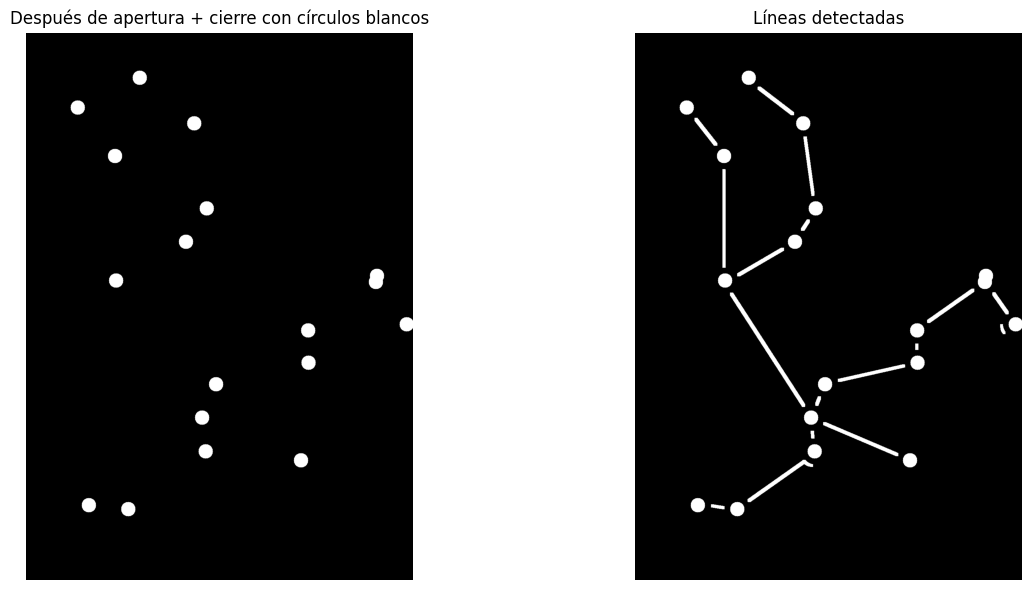

In [2]:
from constellation_processing import process_constellation_image, visualize_results
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Ruta de la imagen
image_path = "./image0.jpg"

# Procesar imagen
image_circles, image_lines, output_filtered = process_constellation_image(image_path)

# Visualizar resultados
visualize_results(image_circles, output_filtered)

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("theprakharsrivastava/stargazer")

print("Path to dataset files:", path)

/home/stargix/miniconda3/envs/proves/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1


In [4]:
import os

# Listar archivos y carpetas en el directorio del dataset
print(os.listdir(path))


['Contellations Segmentation']


In [5]:
# Explorar el subdirectorio
contellations_path = os.path.join(path, 'Contellations Segmentation')
print("Contenido de 'Contellations Segmentation':")
print(os.listdir(contellations_path))

Contenido de 'Contellations Segmentation':
['train', 'test', 'Mapper.xlsx']


In [6]:
import pandas as pd
from glob import glob

# Función para obtener todas las imágenes recursivamente
def get_all_images(base_path):
    image_data = []
    
    # Buscar en train y test
    for split in ['train', 'test']:
        split_path = os.path.join(base_path, split)
        if os.path.exists(split_path):
            # Buscar todas las imágenes (jpg, png, jpeg)
            image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.JPG', '*.JPEG', '*.PNG']
            
            for ext in image_extensions:
                # Buscar recursivamente
                images = glob(os.path.join(split_path, '**', ext), recursive=True)
                
                for img_path in images:
                    # Extraer información
                    relative_path = os.path.relpath(img_path, contellations_path)
                    filename = os.path.basename(img_path)
                    folder = os.path.dirname(relative_path)
                    
                    image_data.append({
                        'full_path': img_path,
                        'filename': filename,
                        'folder': folder,
                        'split': split,
                        'relative_path': relative_path
                    })
    
    return pd.DataFrame(image_data)

# Crear el DataFrame con todas las imágenes
df_images = get_all_images(contellations_path)

print(f"Total de imágenes encontradas: {len(df_images)}")
print(f"\nPrimeras 5 filas:")
print(df_images.head())

Total de imágenes encontradas: 90

Primeras 5 filas:
                                           full_path     filename folder  \
0  /home/stargix/.cache/kagglehub/datasets/thepra...  image70.jpg  train   
1  /home/stargix/.cache/kagglehub/datasets/thepra...  image65.jpg  train   
2  /home/stargix/.cache/kagglehub/datasets/thepra...  image44.jpg  train   
3  /home/stargix/.cache/kagglehub/datasets/thepra...  image21.jpg  train   
4  /home/stargix/.cache/kagglehub/datasets/thepra...  image87.jpg  train   

   split      relative_path  
0  train  train/image70.jpg  
1  train  train/image65.jpg  
2  train  train/image44.jpg  
3  train  train/image21.jpg  
4  train  train/image87.jpg  


In [7]:
# Estadísticas del dataset
print("=== ESTADÍSTICAS DEL DATASET ===\n")
print(f"Total de imágenes: {len(df_images)}")
print(f"\nDistribución por split:")
print(df_images['split'].value_counts())
print(f"\nInformación del DataFrame:")
print(df_images.info())

=== ESTADÍSTICAS DEL DATASET ===

Total de imágenes: 90

Distribución por split:
split
train    88
test      2
Name: count, dtype: int64

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   full_path      90 non-null     object
 1   filename       90 non-null     object
 2   folder         90 non-null     object
 3   split          90 non-null     object
 4   relative_path  90 non-null     object
dtypes: object(5)
memory usage: 3.6+ KB
None


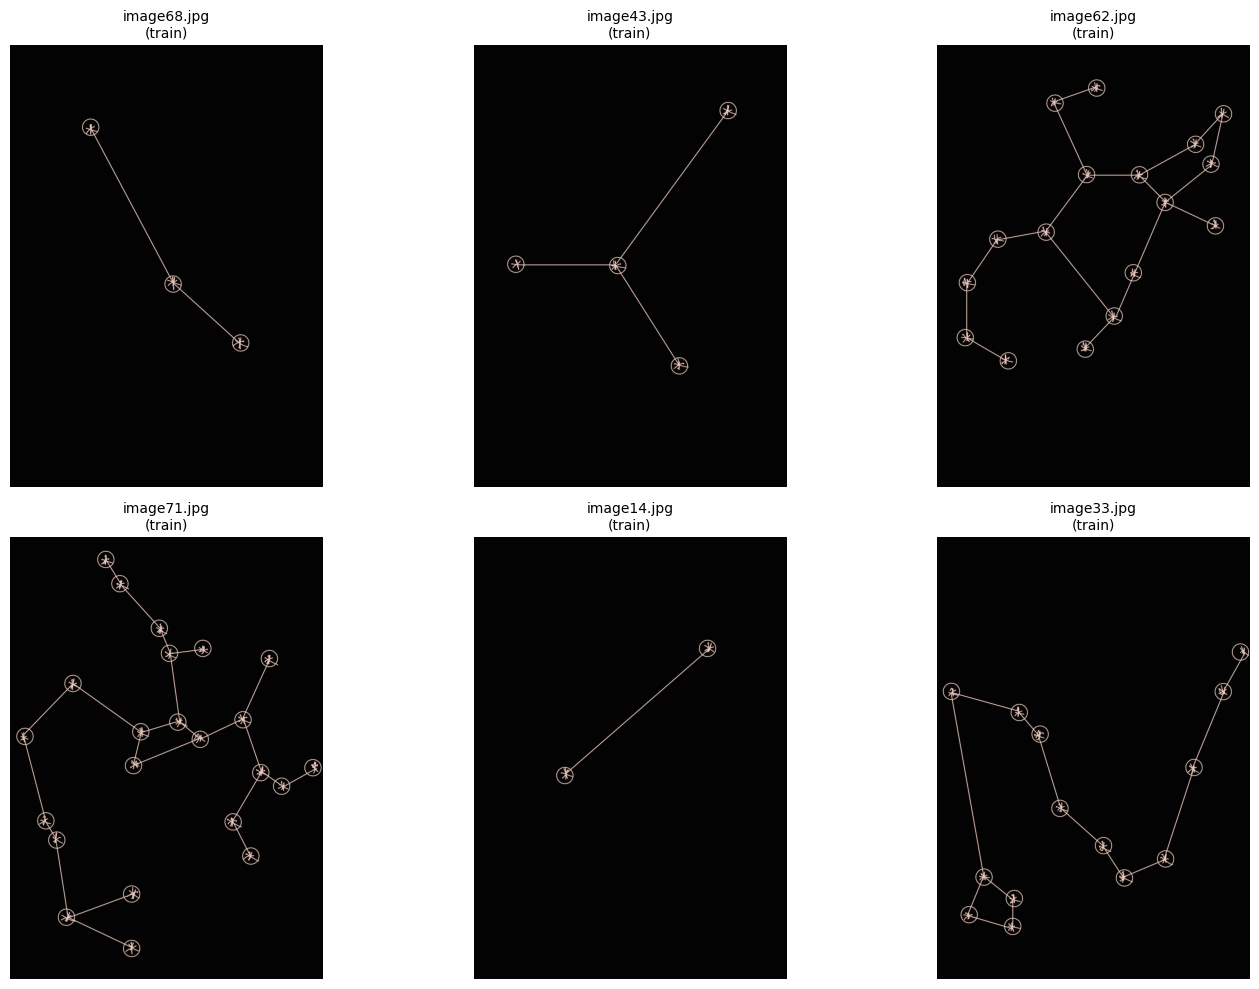


Dimensiones de las imágenes:
image68.jpg: (1527, 1080, 3)
image43.jpg: (1527, 1080, 3)
image62.jpg: (1527, 1080, 3)


In [8]:
# Visualizar algunas imágenes del dataset
import matplotlib.pyplot as plt
import cv2

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# Mostrar 6 imágenes aleatorias
sample_images = df_images.sample(min(6, len(df_images)))

for idx, (_, row) in enumerate(sample_images.iterrows()):
    img = cv2.imread(row['full_path'])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    axes[idx].imshow(img_rgb)
    axes[idx].set_title(f"{row['filename']}\n({row['split']})", fontsize=10)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print(f"\nDimensiones de las imágenes:")
for _, row in sample_images.head(3).iterrows():
    img = cv2.imread(row['full_path'])
    print(f"{row['filename']}: {img.shape}")

In [9]:
# Verificar si existe el archivo Mapper.xlsx y cargarlo

mapper_path = os.path.join(contellations_path, 'Mapper.xlsx')

if os.path.exists(mapper_path):
    df_mapper = pd.read_excel(mapper_path)
    print("Contenido del archivo Mapper.xlsx:")
    print(df_mapper.head(10))
    print(f"\nShape: {df_mapper.shape}")
    print(f"\nColumnas: {df_mapper.columns.tolist()}")
else:
    print("No se encontró el archivo Mapper.xlsx")

Contenido del archivo Mapper.xlsx:
  Constellation Image file                  Constellation name
0               image0.jpg  Andromeda – Royal Sea Monster Bait
1               image1.jpg                   Antlia – Air Pump
2               image2.jpg             Apus – Bird of Paradise
3               image3.jpg             Aquarius – Water-Bearer
4               image4.jpg          Aquila – Thunderbolt Eagle
5               image5.jpg                         Ara – Altar
6               image6.jpg                         Aries – Ram
7               image7.jpg                 Auriga – Charioteer
8               image8.jpg                   Boötes – Herdsman
9               image9.jpg                     Caelum – Chisel

Shape: (88, 2)

Columnas: ['Constellation Image file', 'Constellation name']


In [10]:
# Combinar el DataFrame de imágenes con el Mapper para obtener los nombres de las constelaciones
df_complete = df_images.copy()

# Extraer solo el nombre del archivo sin la ruta
df_complete['image_file'] = df_complete['filename']

# Hacer merge con el mapper
df_complete = df_complete.merge(
    df_mapper, 
    left_on='image_file', 
    right_on='Constellation Image file',
    how='left'
)

# Limpiar columnas duplicadas
df_complete = df_complete.drop('Constellation Image file', axis=1)

# Renombrar para mayor claridad
df_complete = df_complete.rename(columns={'Constellation name': 'constellation_name'})

print("DataFrame completo con información de constelaciones:")
display(df_complete.head(10))
print(f"\nTotal de imágenes con nombre de constelación: {df_complete['constellation_name'].notna().sum()}")
print(f"Total de imágenes sin nombre de constelación: {df_complete['constellation_name'].isna().sum()}")

DataFrame completo con información de constelaciones:


,full_path,filename,folder,split,relative_path,image_file,constellation_name
0,/home/stargix/.cache/kagglehub/datasets/thepra...,image70.jpg,train,train,train/image70.jpg,image70.jpg,Sagitta – Arrow
1,/home/stargix/.cache/kagglehub/datasets/thepra...,image65.jpg,train,train,train/image65.jpg,image65.jpg,Pisces – Fishes
2,/home/stargix/.cache/kagglehub/datasets/thepra...,image44.jpg,train,train,train/image44.jpg,image44.jpg,Lacerta – Lizard
3,/home/stargix/.cache/kagglehub/datasets/thepra...,image21.jpg,train,train,train/image21.jpg,image21.jpg,Chamaeleon – Chameleon
4,/home/stargix/.cache/kagglehub/datasets/thepra...,image87.jpg,train,train,train/image87.jpg,image87.jpg,Vulpecula – Little Fox
5,/home/stargix/.cache/kagglehub/datasets/thepra...,image33.jpg,train,train,train/image33.jpg,image33.jpg,Draco – Dragon
6,/home/stargix/.cache/kagglehub/datasets/thepra...,image59.jpg,train,train,train/image59.jpg,image59.jpg,Orion – Hunter
7,/home/stargix/.cache/kagglehub/datasets/thepra...,image56.jpg,train,train,train/image56.jpg,image56.jpg,Norma – Level
8,/home/stargix/.cache/kagglehub/datasets/thepra...,image71.jpg,train,train,train/image71.jpg,image71.jpg,Sagittarius – Archer
9,/home/stargix/.cache/kagglehub/datasets/thepra...,image57.jpg,train,train,train/image57.jpg,image57.jpg,Octans – Octant



Total de imágenes con nombre de constelación: 88
Total de imágenes sin nombre de constelación: 2


In [11]:
df_constellations = df_complete[['full_path', 'constellation_name']]

display(df_constellations.head(10))

df_constellations.to_csv('constellations_with_names.csv', index=False)

,full_path,constellation_name
0,/home/stargix/.cache/kagglehub/datasets/thepra...,Sagitta – Arrow
1,/home/stargix/.cache/kagglehub/datasets/thepra...,Pisces – Fishes
2,/home/stargix/.cache/kagglehub/datasets/thepra...,Lacerta – Lizard
3,/home/stargix/.cache/kagglehub/datasets/thepra...,Chamaeleon – Chameleon
4,/home/stargix/.cache/kagglehub/datasets/thepra...,Vulpecula – Little Fox
5,/home/stargix/.cache/kagglehub/datasets/thepra...,Draco – Dragon
6,/home/stargix/.cache/kagglehub/datasets/thepra...,Orion – Hunter
7,/home/stargix/.cache/kagglehub/datasets/thepra...,Norma – Level
8,/home/stargix/.cache/kagglehub/datasets/thepra...,Sagittarius – Archer
9,/home/stargix/.cache/kagglehub/datasets/thepra...,Octans – Octant


Carpeta de destino: /home/stargix/Desktop/hackathons/NASA/NASA-AI-i-Oli/tests/processed_constellations

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image70.jpg - Constelación: Sagitta – Arrow


Radio moda (más frecuente): 27 (aparece 2 veces)
Radio promedio: 30.00
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 6
Círculos rechazados por tamaño: 1
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 5
Componentes detectados en imagen final: 10
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 10


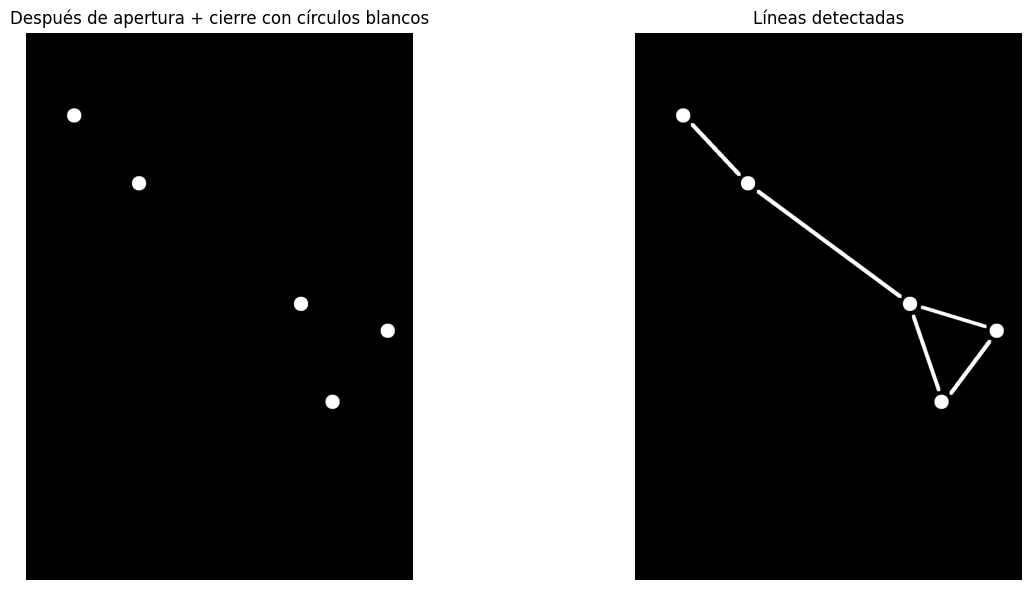

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image65.jpg - Constelación: Pisces – Fishes
Radio moda (más frecuente): 27 (aparece 6 veces)
Radio promedio: 37.00
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 26
Círculos rechazados por tamaño: 10
Círculos rechazados por pocos píxeles blancos: 1
Círculos antes de filtrar overlaps: 15
Componentes detectados en imagen final: 28
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 28


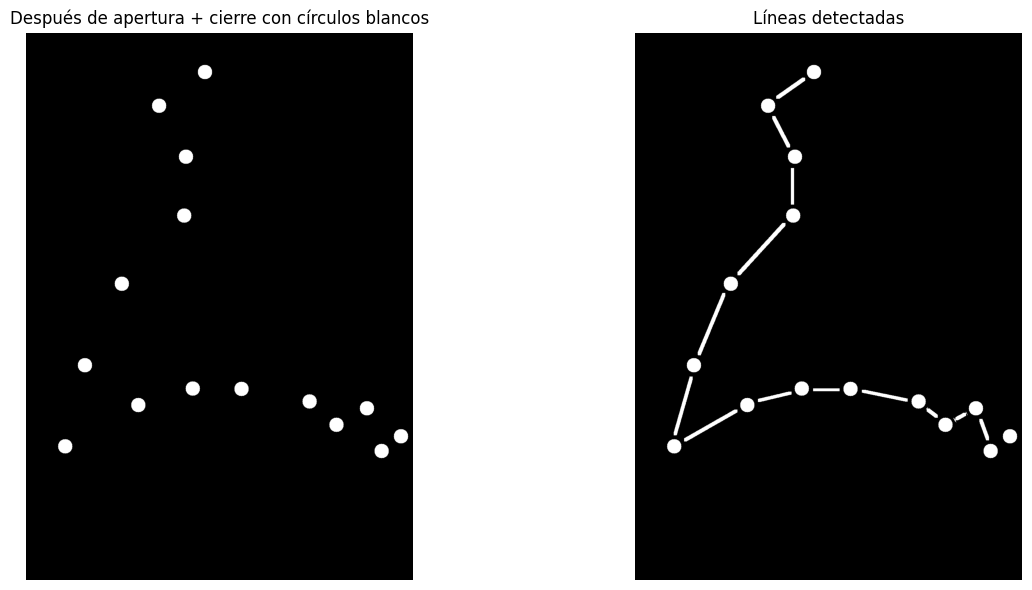

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image44.jpg - Constelación: Lacerta – Lizard
Radio moda (más frecuente): 27 (aparece 3 veces)
Radio promedio: 29.11
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 9
Círculos rechazados por tamaño: 1
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 8
Componentes detectados en imagen final: 15
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 15


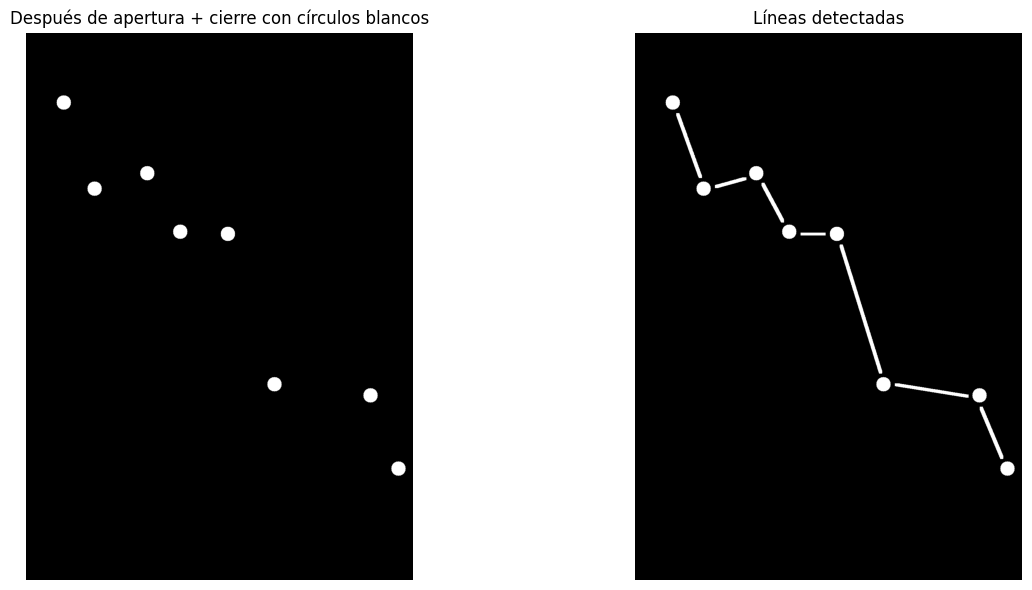

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image21.jpg - Constelación: Chamaeleon – Chameleon
Radio moda (más frecuente): 30 (aparece 3 veces)
Radio promedio: 31.29
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 7
Círculos rechazados por tamaño: 1
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 6
Componentes detectados en imagen final: 9
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 9


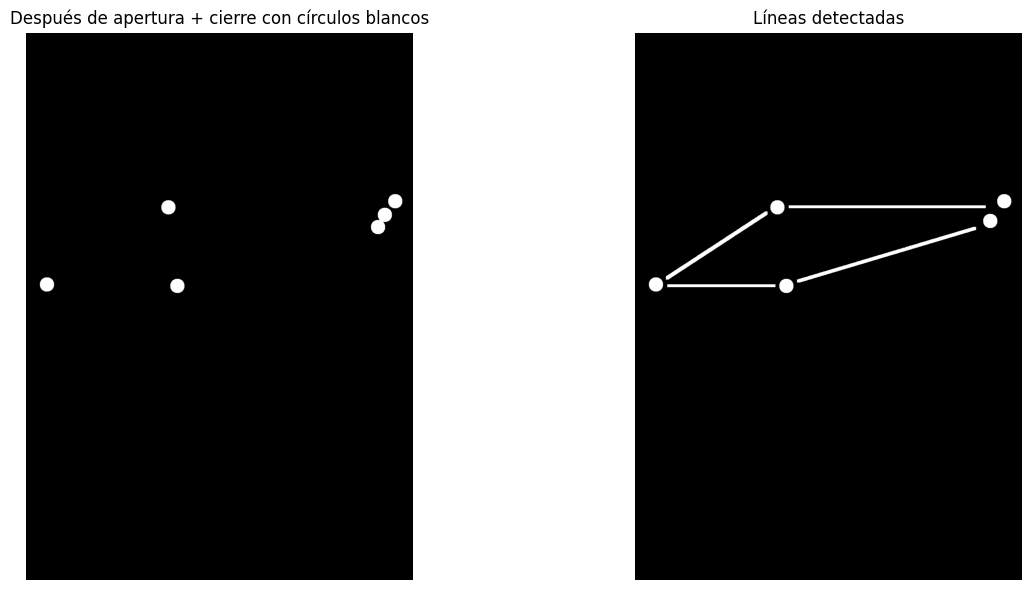

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image87.jpg - Constelación: Vulpecula – Little Fox
Radio moda (más frecuente): 27 (aparece 4 veces)
Radio promedio: 35.57
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 7
Círculos rechazados por tamaño: 2
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 5
Componentes detectados en imagen final: 9
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 9


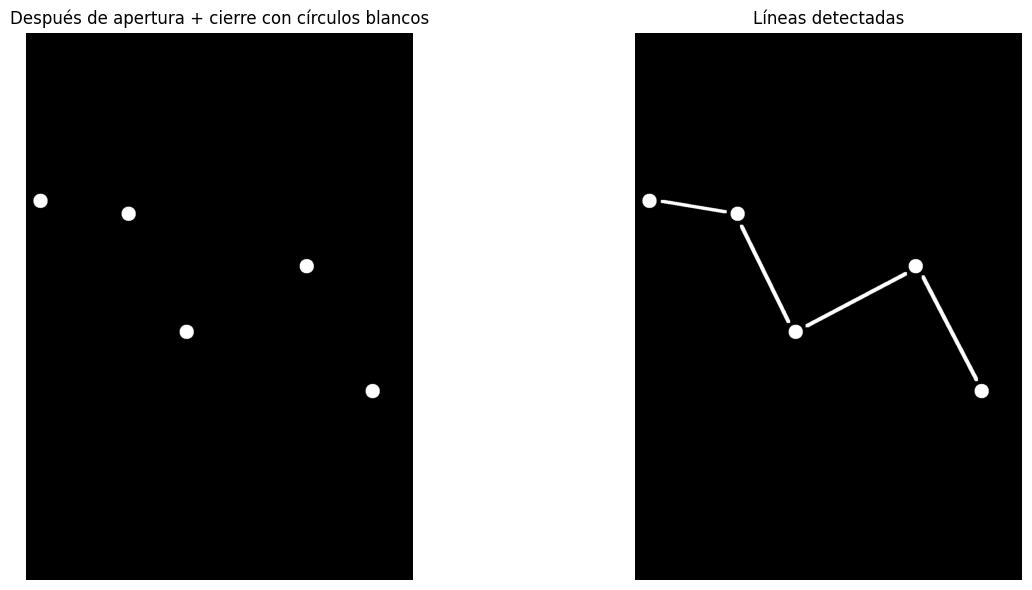

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image33.jpg - Constelación: Draco – Dragon
Radio moda (más frecuente): 30 (aparece 6 veces)
Radio promedio: 37.44
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 25
Círculos rechazados por tamaño: 7
Círculos rechazados por pocos píxeles blancos: 4
Círculos antes de filtrar overlaps: 14
Componentes detectados en imagen final: 28
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 28


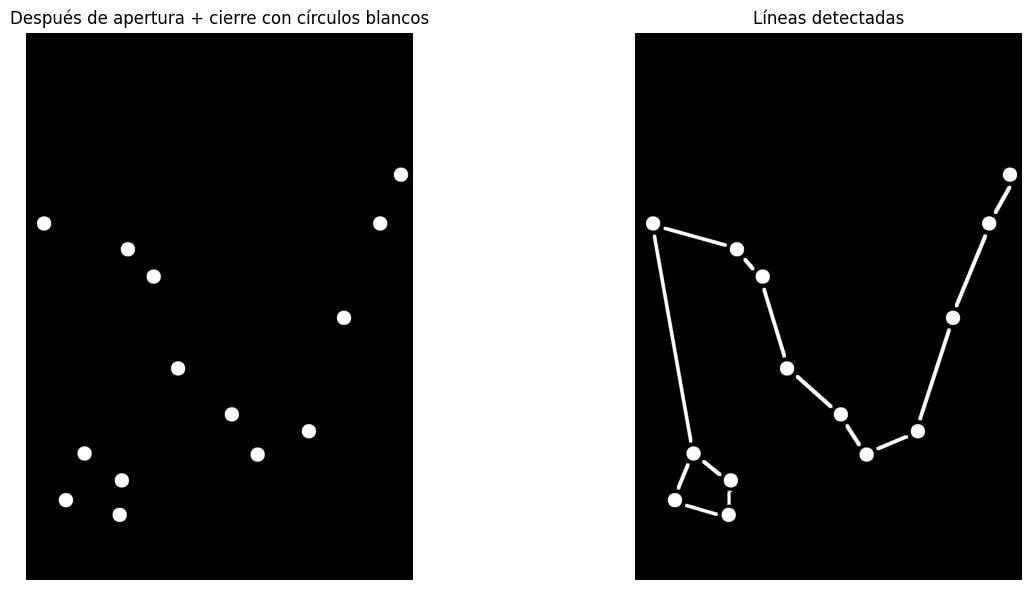

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image59.jpg - Constelación: Orion – Hunter
Radio moda (más frecuente): 30 (aparece 8 veces)
Radio promedio: 38.82
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 38
Círculos rechazados por tamaño: 15
Círculos rechazados por pocos píxeles blancos: 2
Círculos antes de filtrar overlaps: 21
Componentes detectados en imagen final: 40
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 40


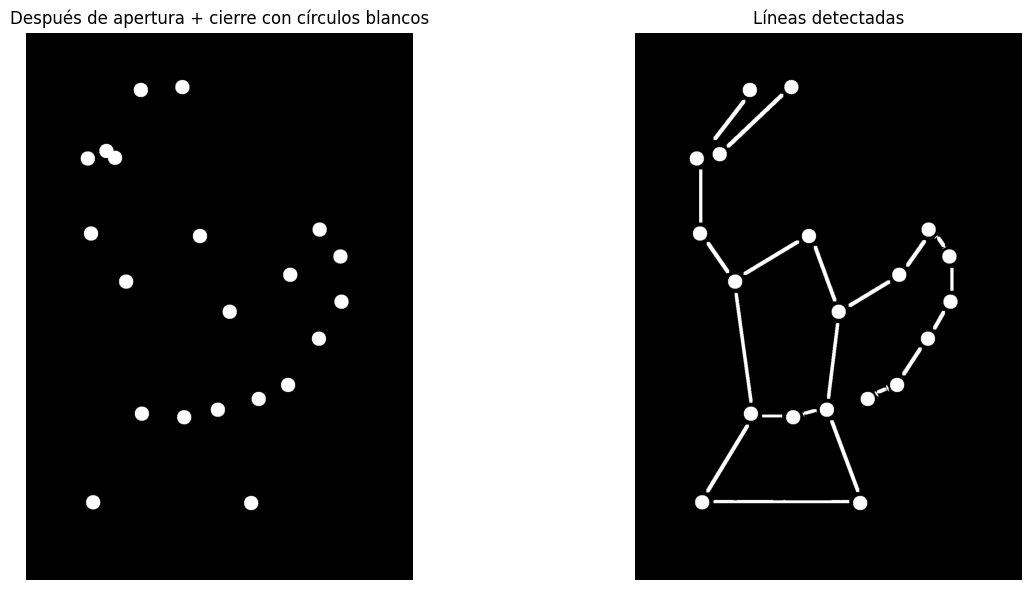

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image56.jpg - Constelación: Norma – Level
Radio moda (más frecuente): 30 (aparece 2 veces)
Radio promedio: 28.75
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 4
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 4
Componentes detectados en imagen final: 7
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 7


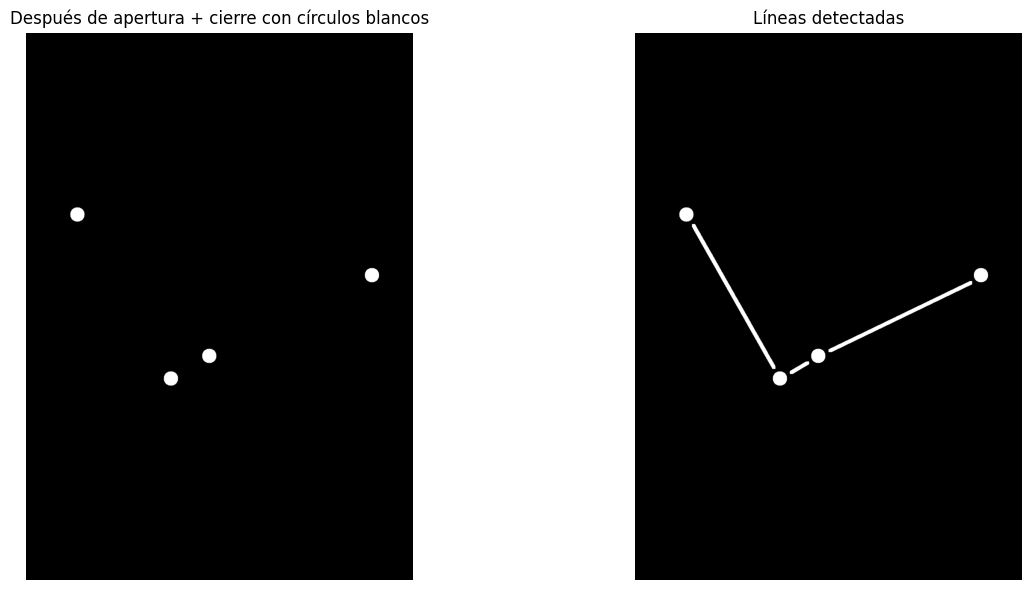

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image71.jpg - Constelación: Sagittarius – Archer
Radio moda (más frecuente): 27 (aparece 8 veces)
Radio promedio: 36.00
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 41
Círculos rechazados por tamaño: 15
Círculos rechazados por pocos píxeles blancos: 3
Círculos antes de filtrar overlaps: 23
Componentes detectados en imagen final: 47
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 47


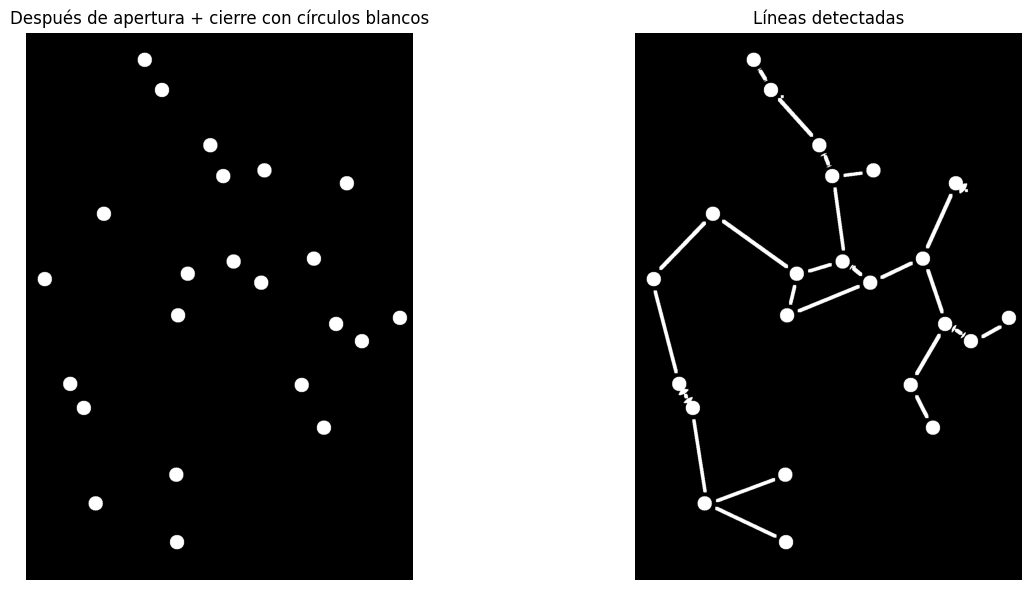

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image57.jpg - Constelación: Octans – Octant
Radio moda (más frecuente): 27 (aparece 2 veces)
Radio promedio: 26.67
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 3
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 3
Componentes detectados en imagen final: 7
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 7


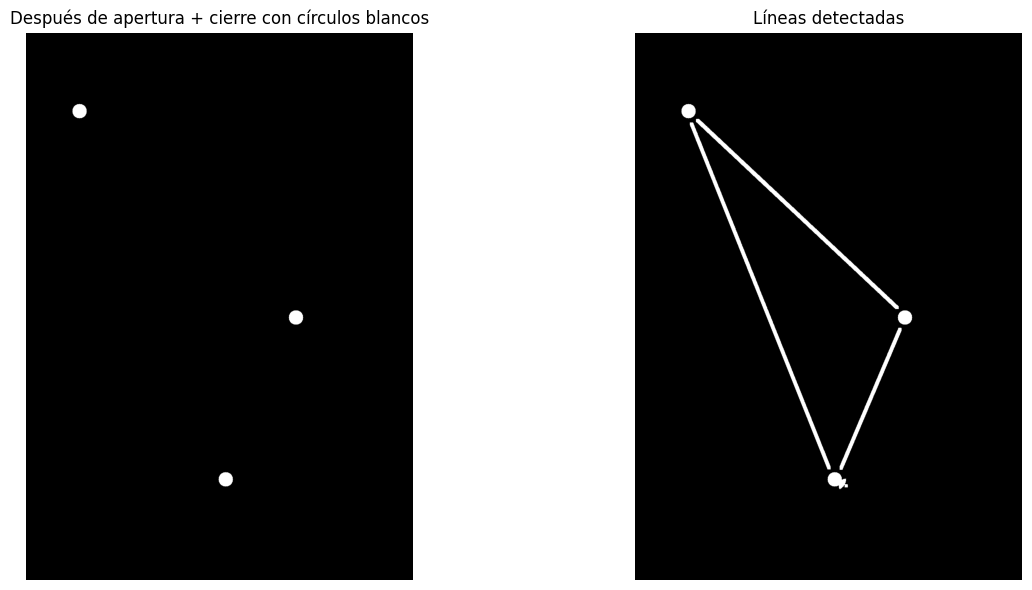

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image34.jpg - Constelación: Equuleus – Little Horse
Radio moda (más frecuente): 30 (aparece 3 veces)
Radio promedio: 29.25
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 4
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 4
Componentes detectados en imagen final: 8
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 8


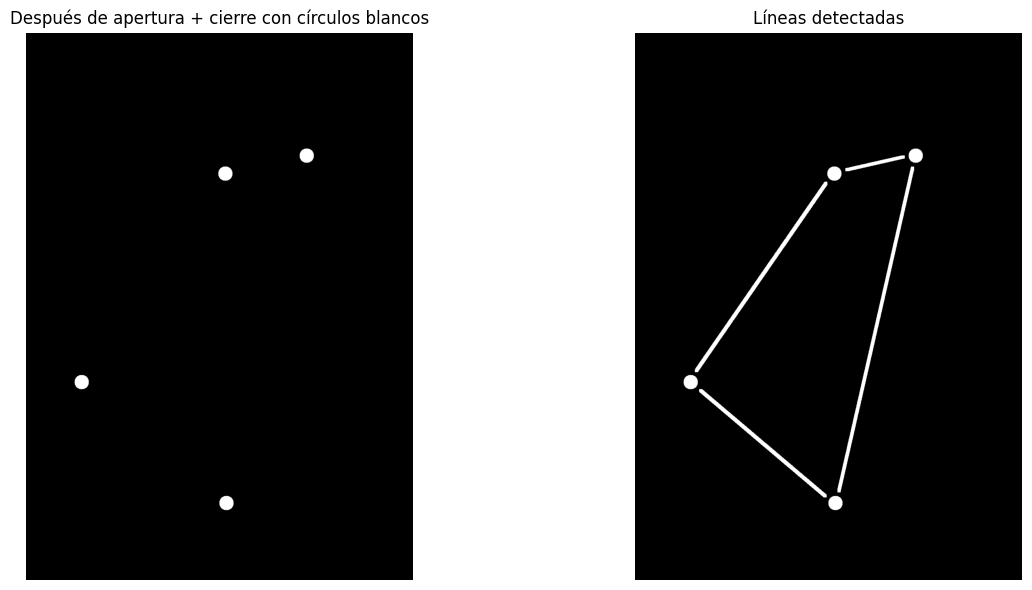

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image50.jpg - Constelación: Lynx – Lynx
Radio moda (más frecuente): 27 (aparece 3 veces)
Radio promedio: 28.14
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 7
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 7
Componentes detectados en imagen final: 14
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 14


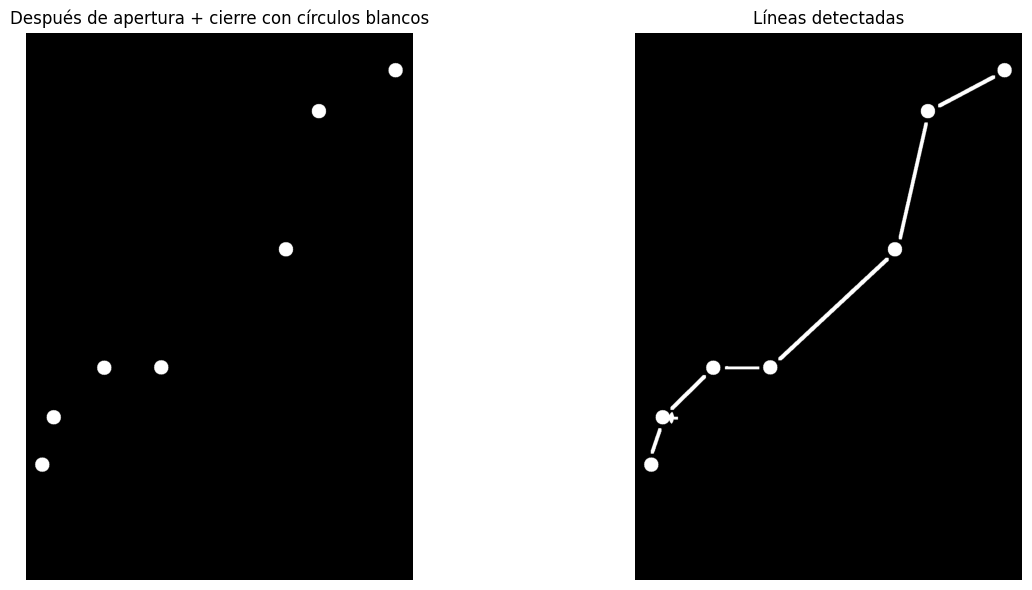

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image64.jpg - Constelación: Pictor – Painter’s Easel
Radio moda (más frecuente): 30 (aparece 2 veces)
Radio promedio: 39.00
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 5
Círculos rechazados por tamaño: 1
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 4
Componentes detectados en imagen final: 7
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 7


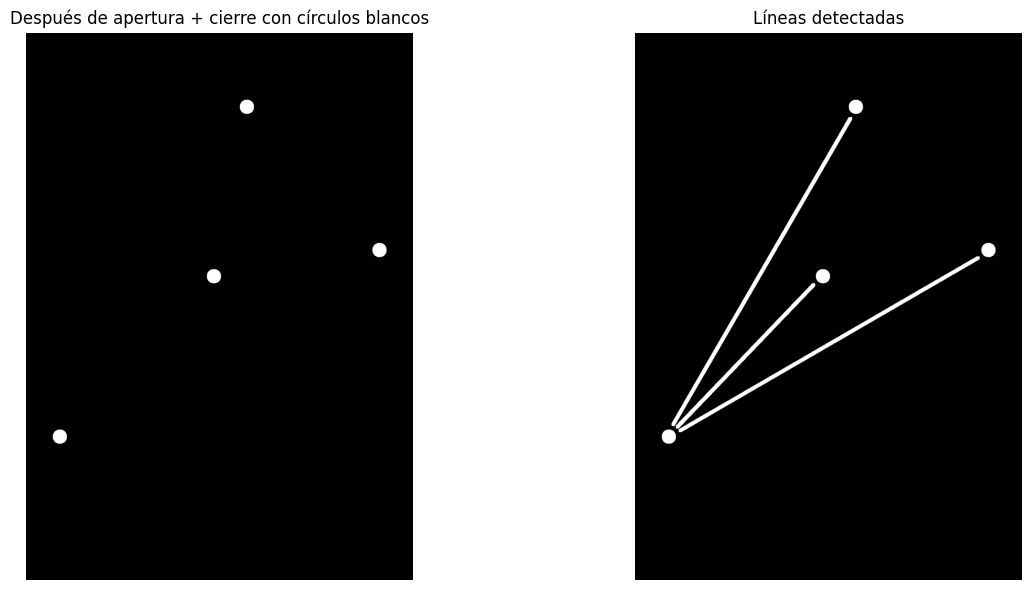

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image53.jpg - Constelación: Microscopium – Microscope
Radio moda (más frecuente): 27 (aparece 3 veces)
Radio promedio: 33.50
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 6
Círculos rechazados por tamaño: 2
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 4
Componentes detectados en imagen final: 7
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 7


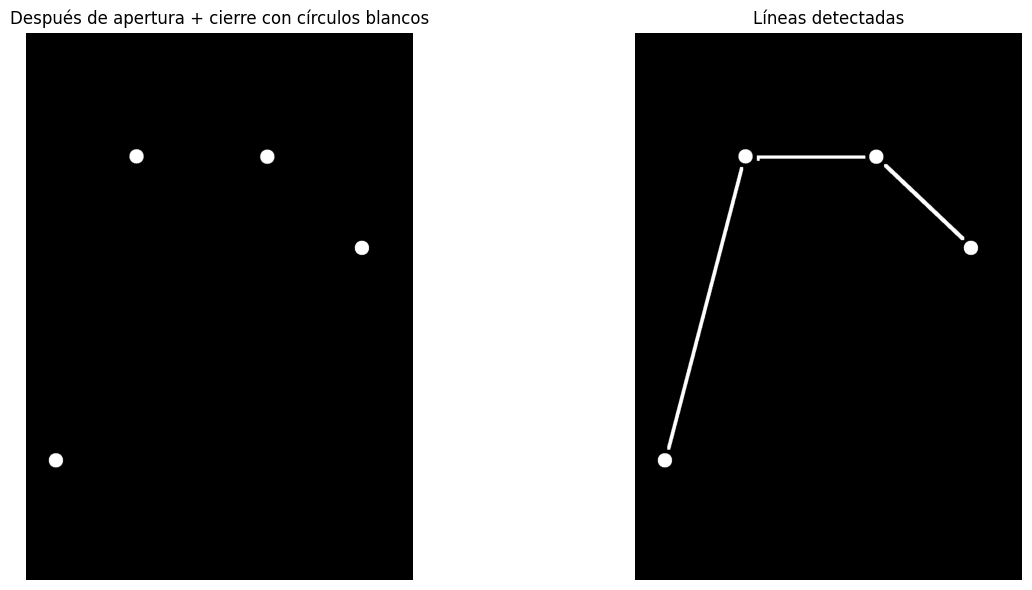

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image75.jpg - Constelación: Serpens – Serpent
Radio moda (más frecuente): 30 (aparece 5 veces)
Radio promedio: 33.61
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 18
Círculos rechazados por tamaño: 4
Círculos rechazados por pocos píxeles blancos: 1
Círculos antes de filtrar overlaps: 13
Componentes detectados en imagen final: 25
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 25


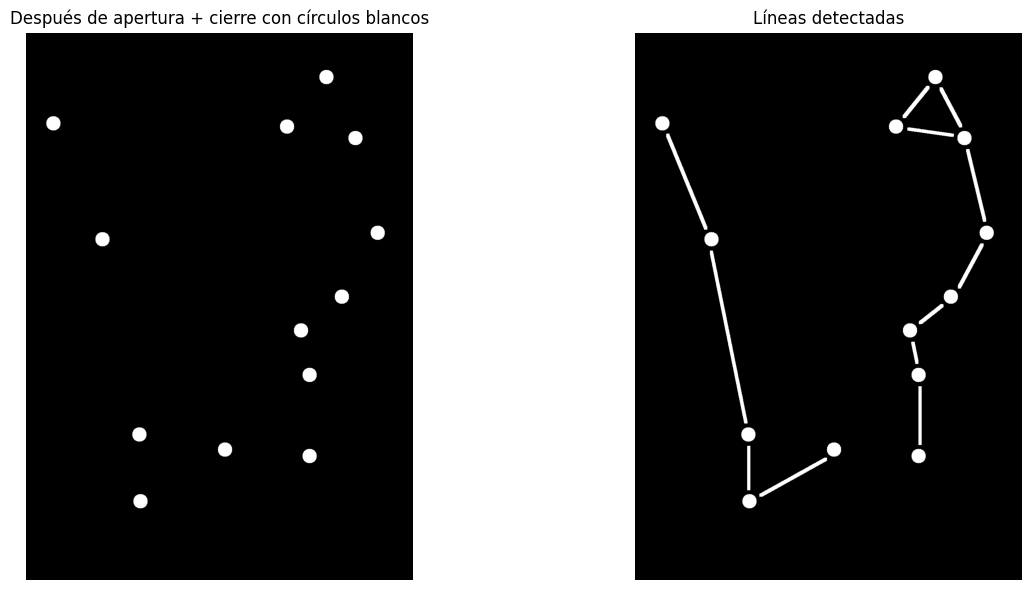

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image1.jpg - Constelación: Antlia – Air Pump
Radio moda (más frecuente): 27 (aparece 2 veces)
Radio promedio: 28.50
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 4
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 4
Componentes detectados en imagen final: 7
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 7


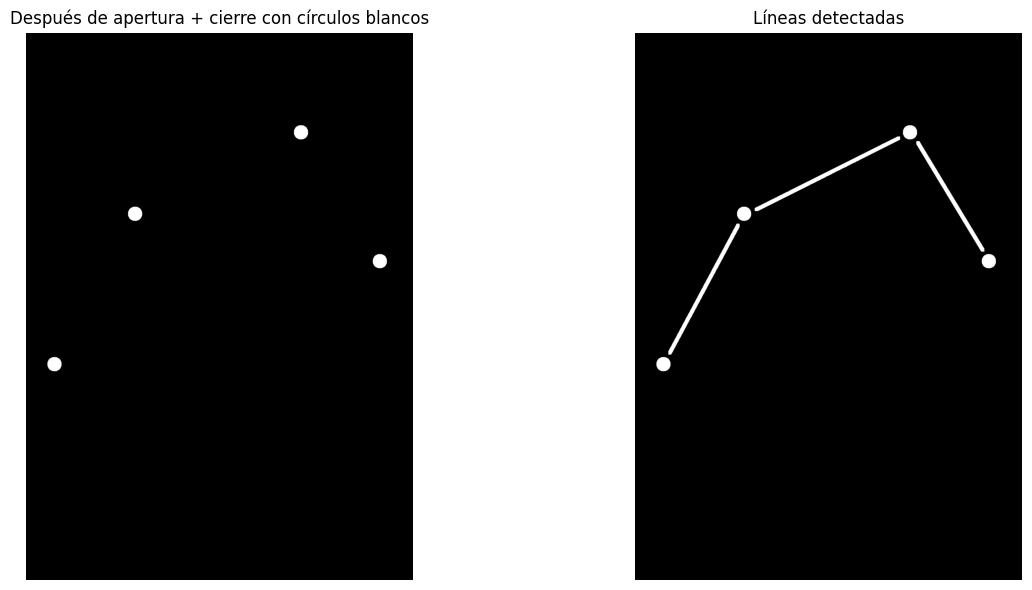

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image81.jpg - Constelación: Tucana – Toucan
Radio moda (más frecuente): 30 (aparece 6 veces)
Radio promedio: 29.57
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 7
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 1
Círculos antes de filtrar overlaps: 6
Componentes detectados en imagen final: 12
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 12


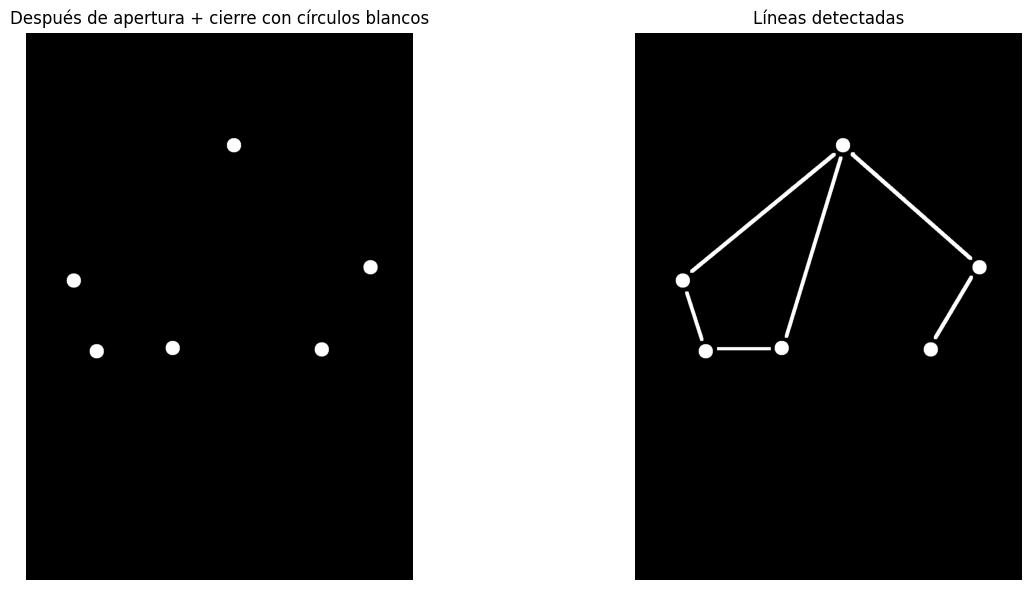

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image42.jpg - Constelación: Hydrus – Watersnake
Radio moda (más frecuente): 30 (aparece 3 veces)
Radio promedio: 31.86
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 7
Círculos rechazados por tamaño: 1
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 6
Componentes detectados en imagen final: 11
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 11


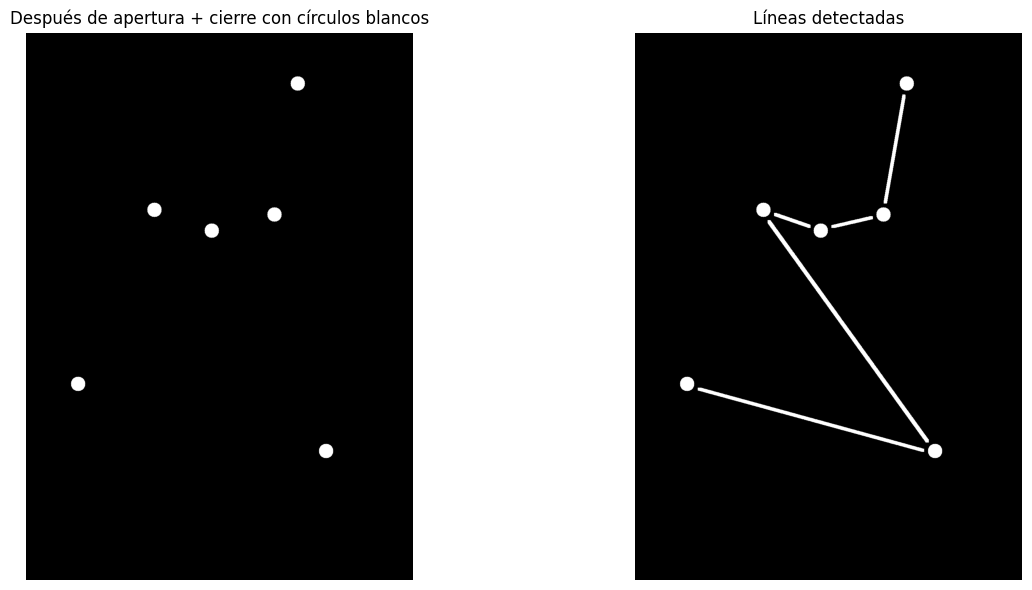

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image54.jpg - Constelación: Monoceros – Unicorn
Radio moda (más frecuente): 26 (aparece 2 veces)
Radio promedio: 27.33
Rango aceptable (basado en moda): [20.80, 31.20]
Círculos detectados inicialmente: 9
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 1
Círculos antes de filtrar overlaps: 8
Componentes detectados en imagen final: 17
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 17


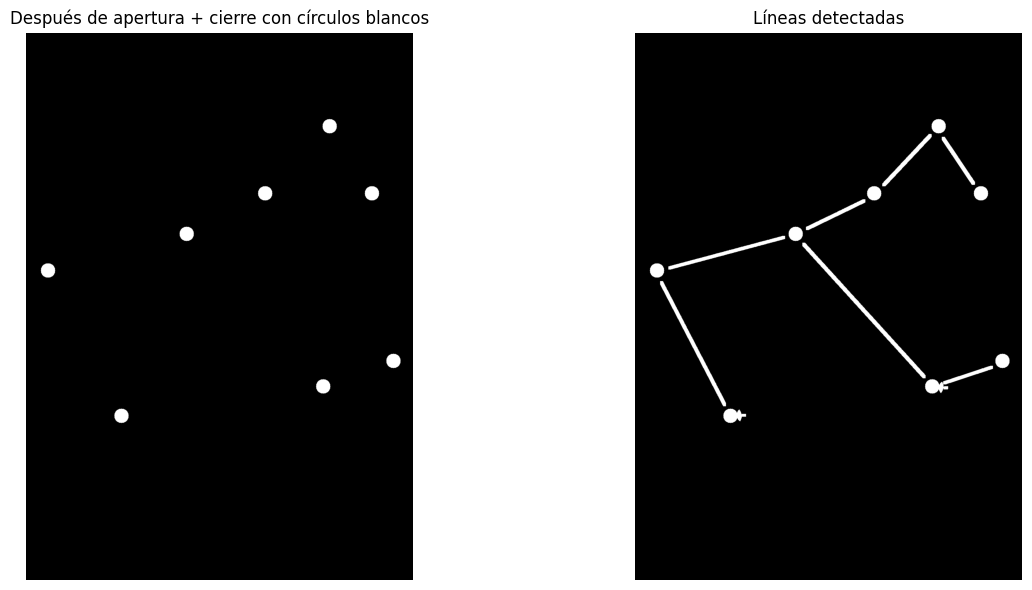

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image35.jpg - Constelación: Eridanus – River
Radio moda (más frecuente): 27 (aparece 13 veces)
Radio promedio: 39.42
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 60
Círculos rechazados por tamaño: 24
Círculos rechazados por pocos píxeles blancos: 5
Círculos antes de filtrar overlaps: 31
Componentes detectados en imagen final: 53
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 53


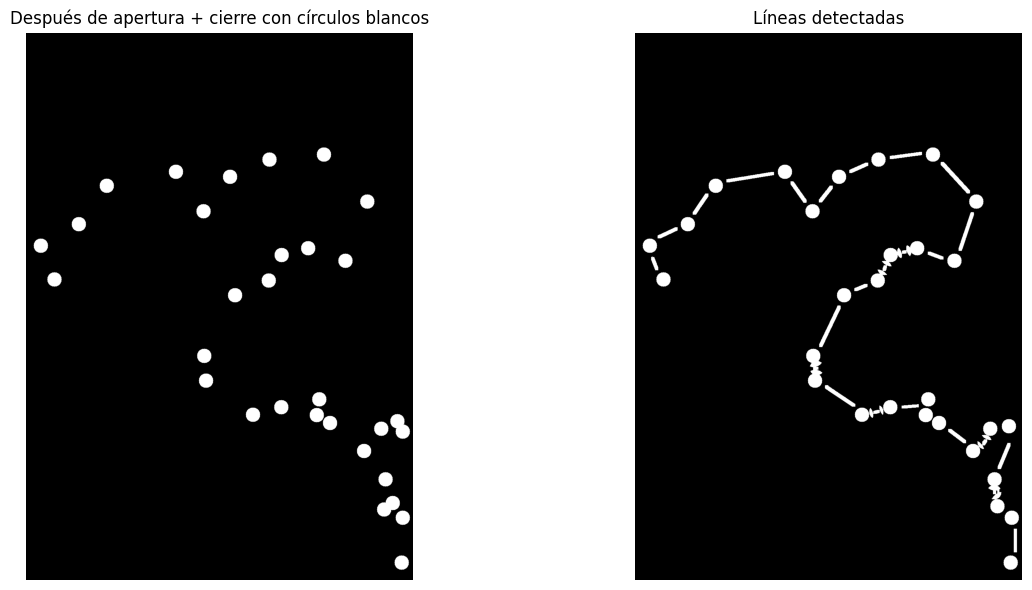

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image13.jpg - Constelación: Canis Major – Big Dog
Radio moda (más frecuente): 30 (aparece 7 veces)
Radio promedio: 39.48
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 31
Círculos rechazados por tamaño: 12
Círculos rechazados por pocos píxeles blancos: 2
Círculos antes de filtrar overlaps: 17
Componentes detectados en imagen final: 33
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 33


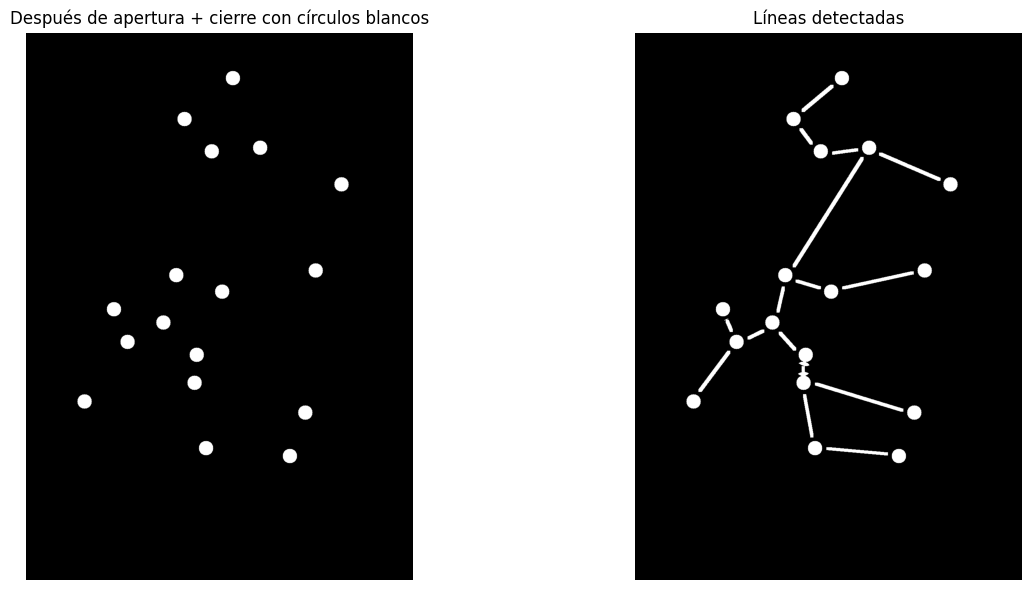

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image28.jpg - Constelación: Crater – Cup
Radio moda (más frecuente): 27 (aparece 3 veces)
Radio promedio: 28.25
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 8
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 8
Componentes detectados en imagen final: 16
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 16


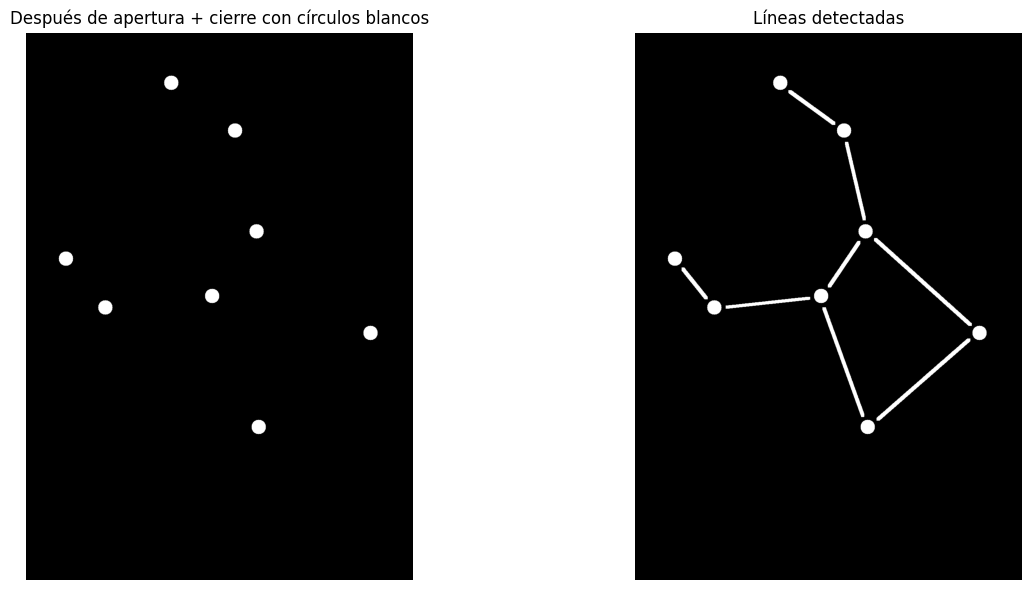

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image19.jpg - Constelación: Cepheus – King
Radio moda (más frecuente): 29 (aparece 3 veces)
Radio promedio: 36.57
Rango aceptable (basado en moda): [23.20, 34.80]
Círculos detectados inicialmente: 14
Círculos rechazados por tamaño: 3
Círculos rechazados por pocos píxeles blancos: 1
Círculos antes de filtrar overlaps: 10
Componentes detectados en imagen final: 20
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 20


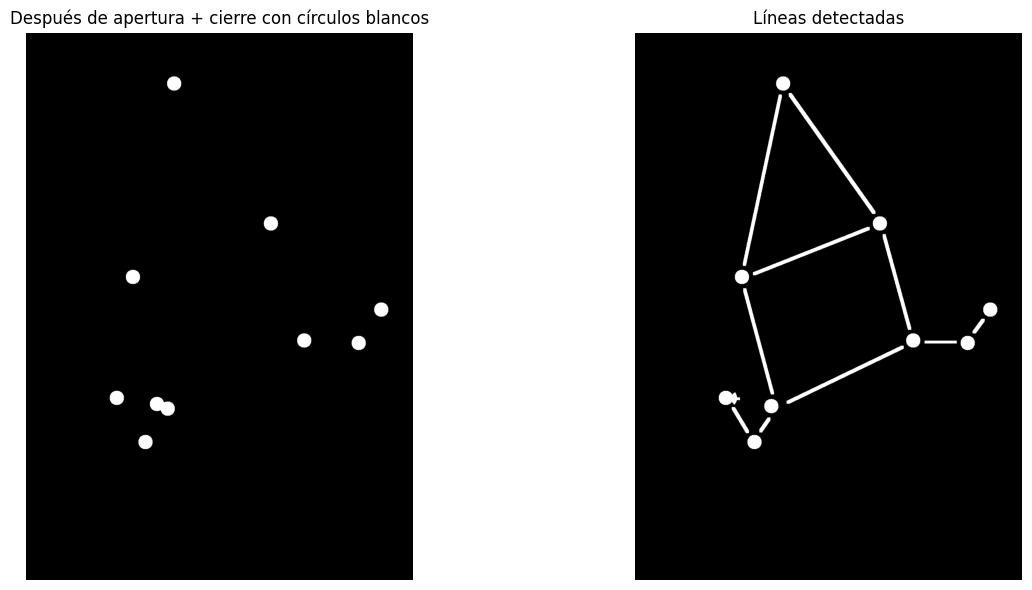

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image38.jpg - Constelación: Grus – Crane
Radio moda (más frecuente): 27 (aparece 4 veces)
Radio promedio: 31.09
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 11
Círculos rechazados por tamaño: 1
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 10
Componentes detectados en imagen final: 20
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 20


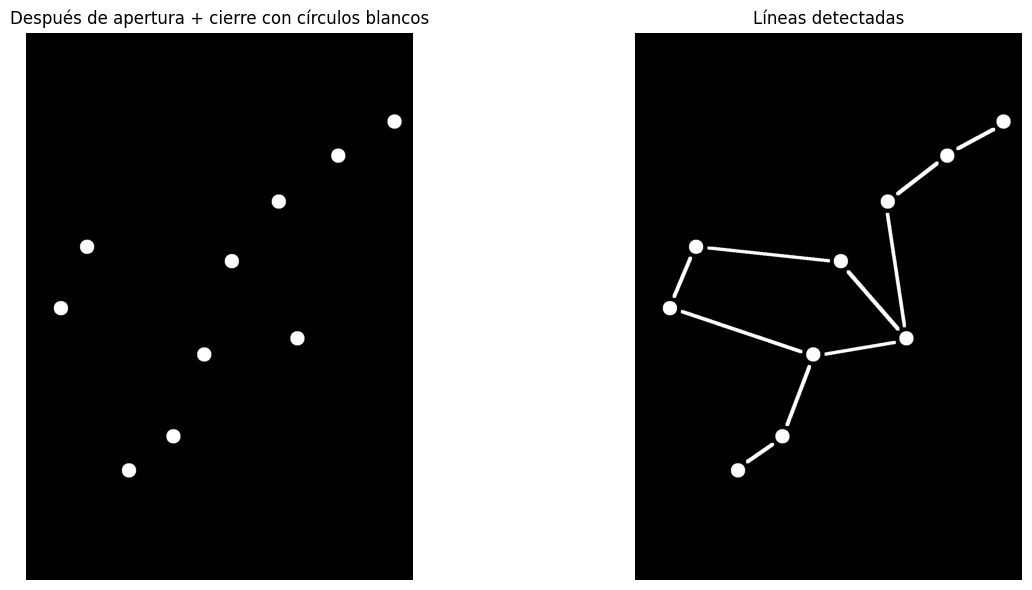

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image9.jpg - Constelación: Caelum – Chisel
Radio moda (más frecuente): 30 (aparece 3 veces)
Radio promedio: 29.75
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 4
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 4
Componentes detectados en imagen final: 7
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 7


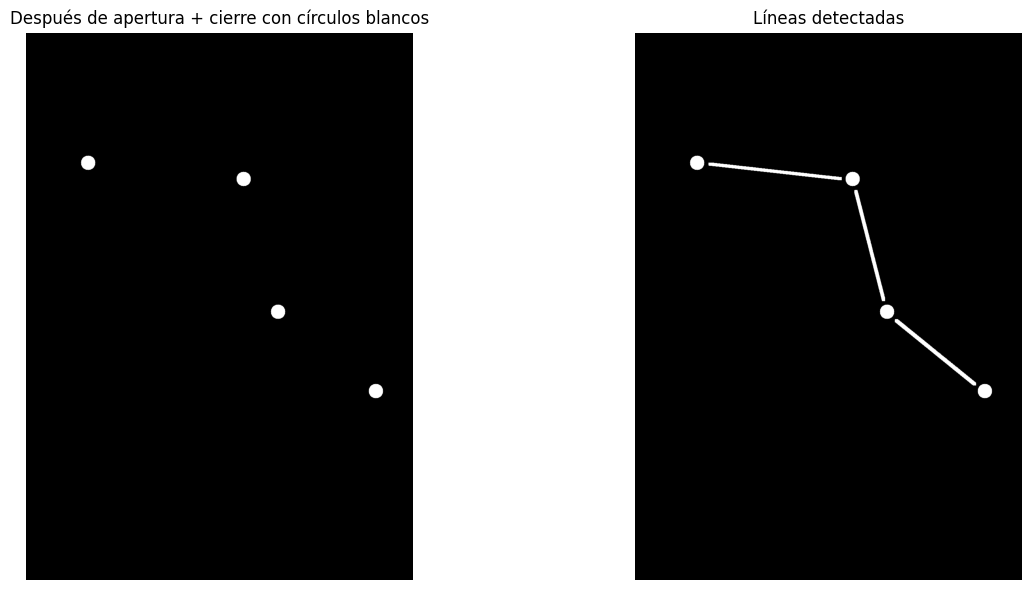

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image3.jpg - Constelación: Aquarius – Water-Bearer
Radio moda (más frecuente): 29 (aparece 2 veces)
Radio promedio: 29.50
Rango aceptable (basado en moda): [23.20, 34.80]
Círculos detectados inicialmente: 4
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 4
Componentes detectados en imagen final: 7
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 7


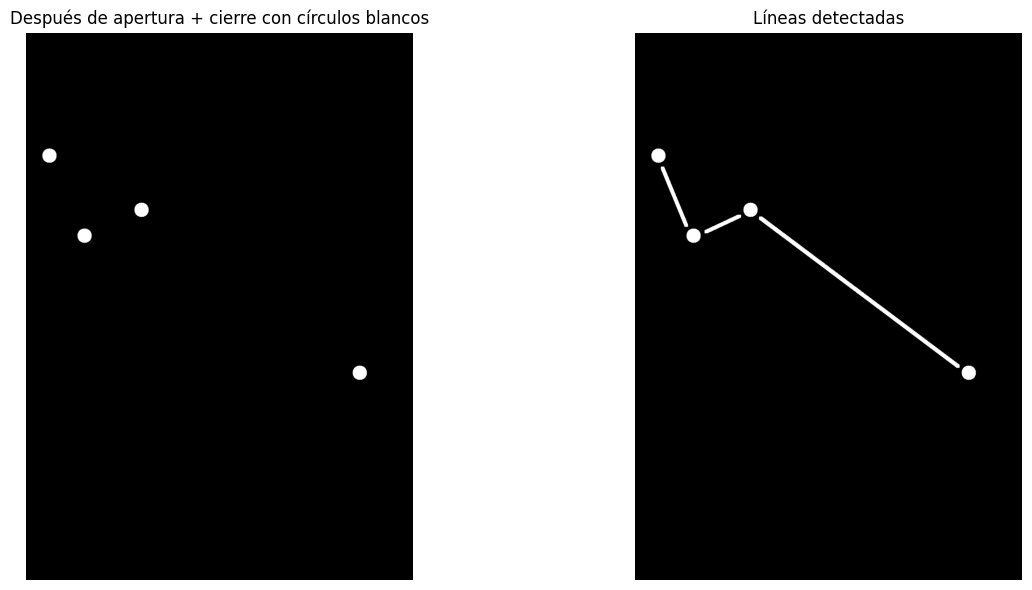

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image62.jpg - Constelación: Perseus – Greek Hero
Radio moda (más frecuente): 30 (aparece 9 veces)
Radio promedio: 37.93
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 29
Círculos rechazados por tamaño: 8
Círculos rechazados por pocos píxeles blancos: 4
Círculos antes de filtrar overlaps: 17
Componentes detectados en imagen final: 35
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 35


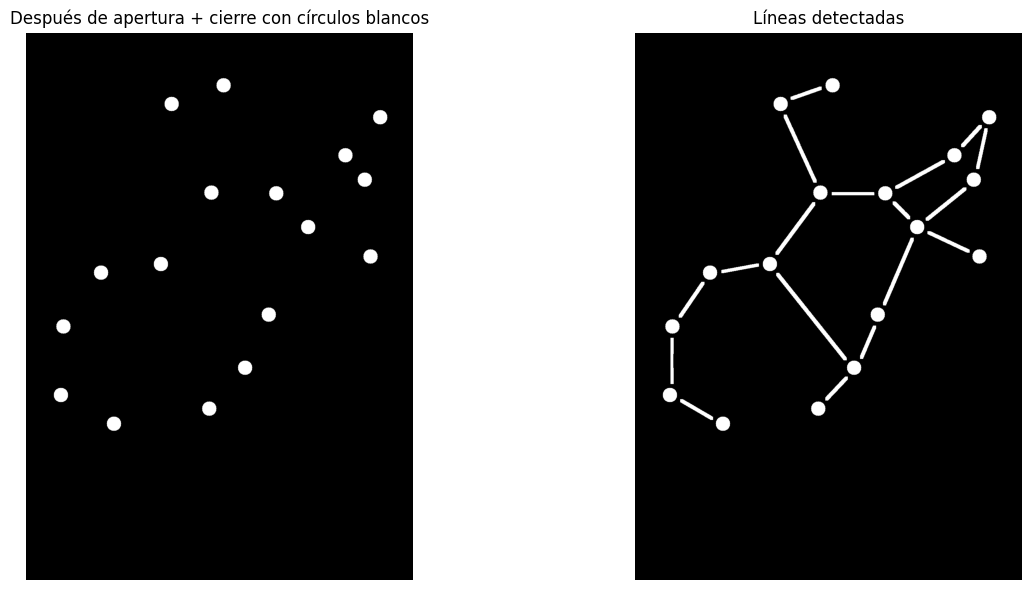

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image36.jpg - Constelación: Fornax – Furnace
Radio moda (más frecuente): 26 (aparece 1 veces)
Radio promedio: 28.83
Rango aceptable (basado en moda): [20.80, 31.20]
Círculos detectados inicialmente: 6
Círculos rechazados por tamaño: 1
Círculos rechazados por pocos píxeles blancos: 1
Círculos antes de filtrar overlaps: 4
Componentes detectados en imagen final: 8
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 8


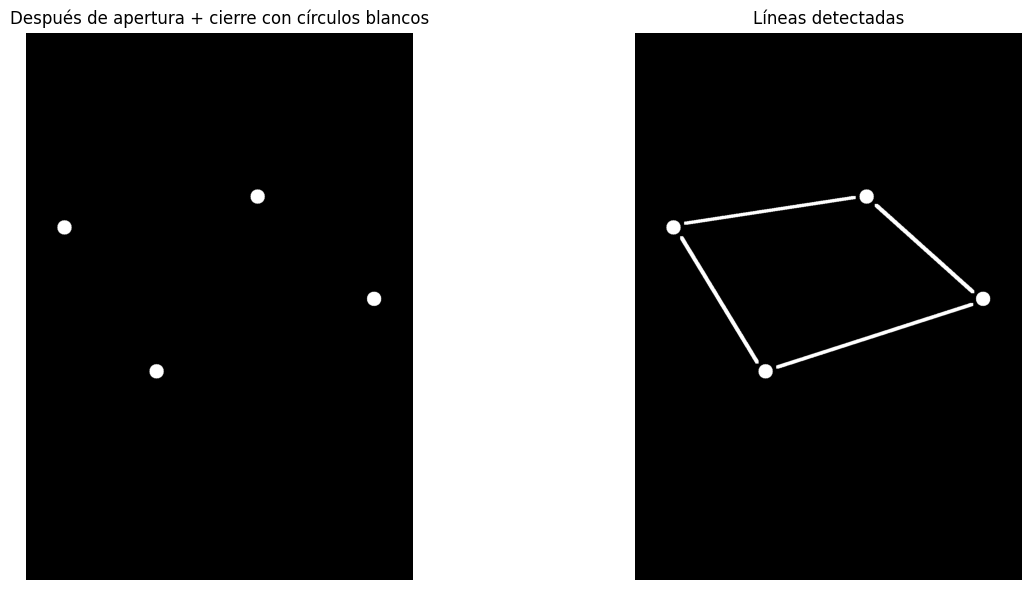

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image82.jpg - Constelación: Ursa Major – Big bear
Radio moda (más frecuente): 30 (aparece 8 veces)
Radio promedio: 37.00
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 32
Círculos rechazados por tamaño: 12
Círculos rechazados por pocos píxeles blancos: 1
Círculos antes de filtrar overlaps: 19
Componentes detectados en imagen final: 40
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 40


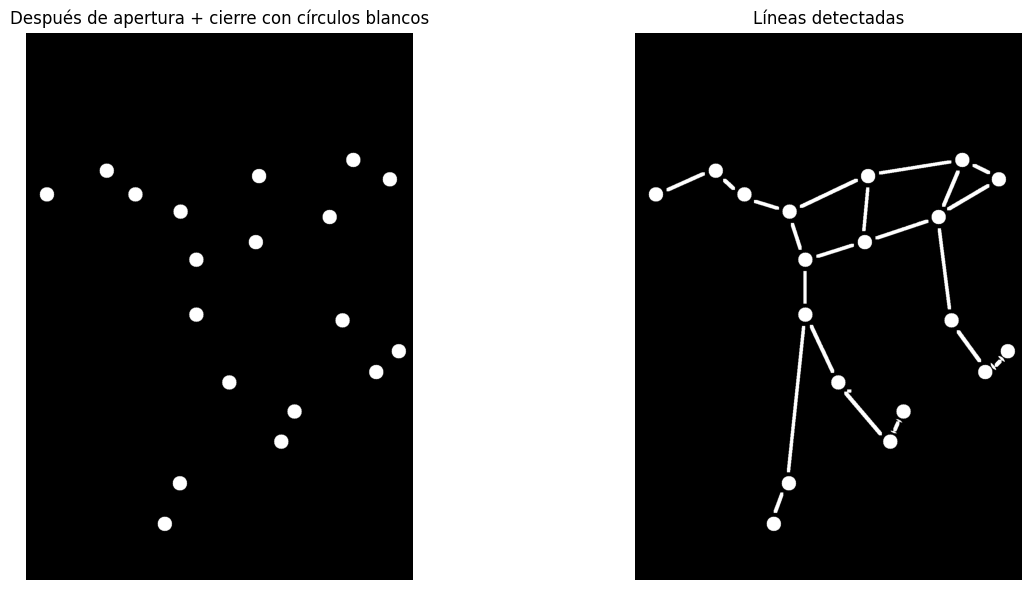

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image39.jpg - Constelación: Hercules – Strong Man
Radio moda (más frecuente): 27 (aparece 8 veces)
Radio promedio: 36.26
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 35
Círculos rechazados por tamaño: 12
Círculos rechazados por pocos píxeles blancos: 1
Círculos antes de filtrar overlaps: 22
Componentes detectados en imagen final: 44
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 44


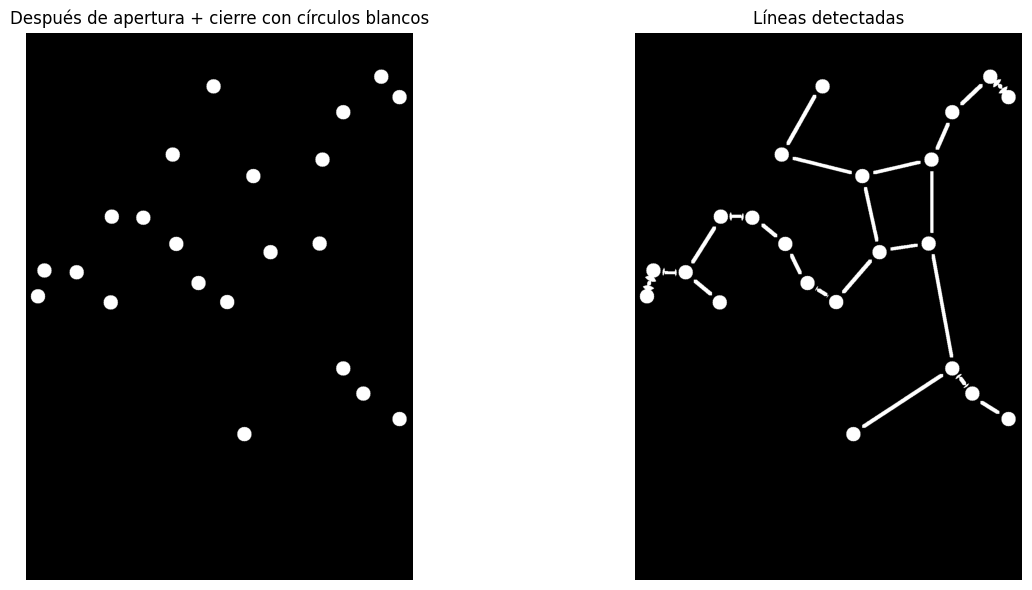

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image11.jpg - Constelación: Cancer – Crab
Radio moda (más frecuente): 27 (aparece 2 veces)
Radio promedio: 28.60
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 5
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 5
Componentes detectados en imagen final: 9
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 9


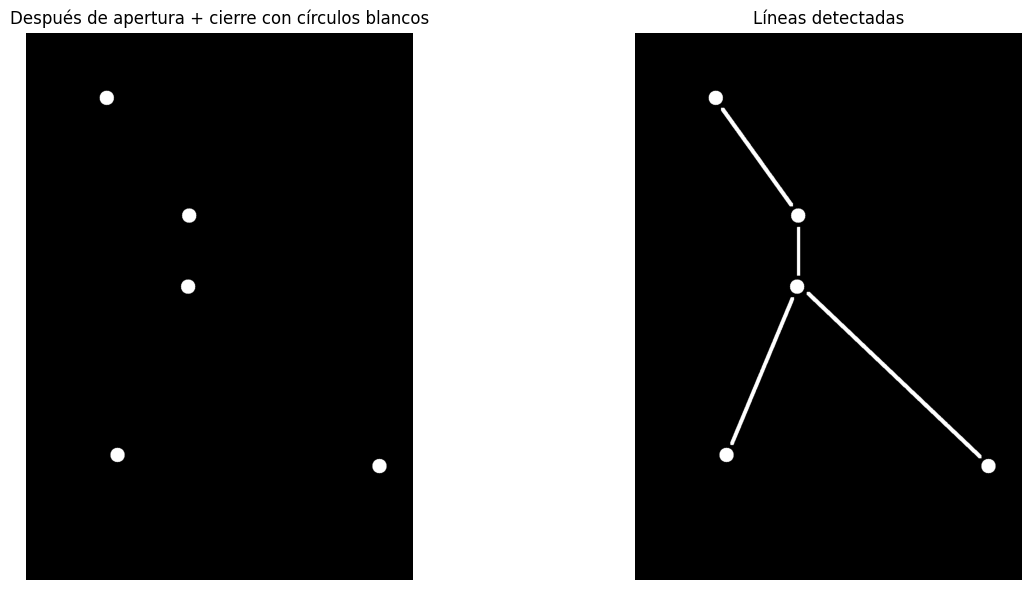

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image4.jpg - Constelación: Aquila – Thunderbolt Eagle
Radio moda (más frecuente): 30 (aparece 4 veces)
Radio promedio: 30.77
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 13
Círculos rechazados por tamaño: 2
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 11
Componentes detectados en imagen final: 23
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 23


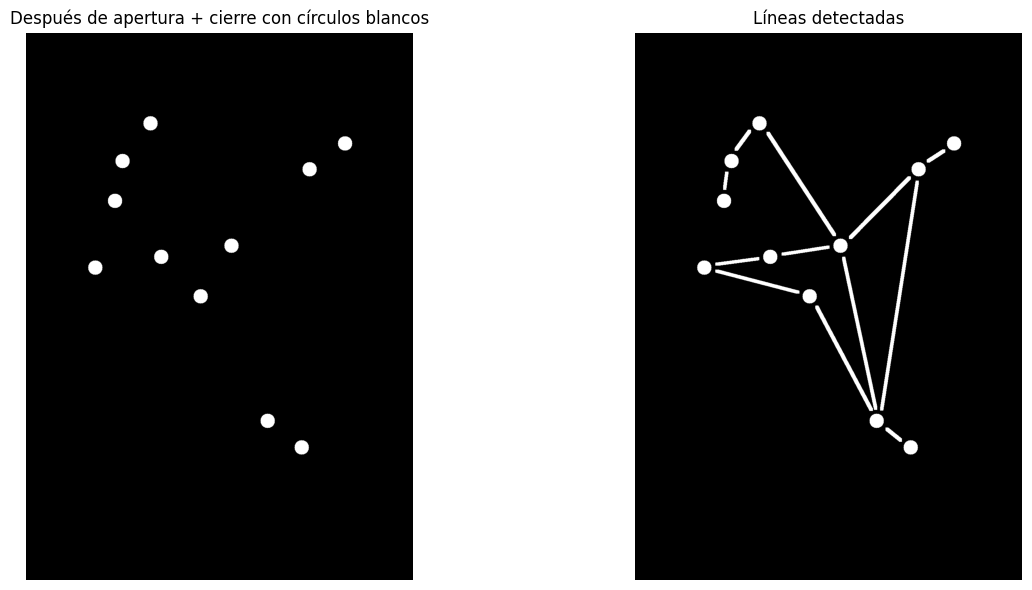

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image29.jpg - Constelación: Crux – Southern Cross
Radio moda (más frecuente): 27 (aparece 2 veces)
Radio promedio: 28.50
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 4
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 4
Componentes detectados en imagen final: 5
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 5


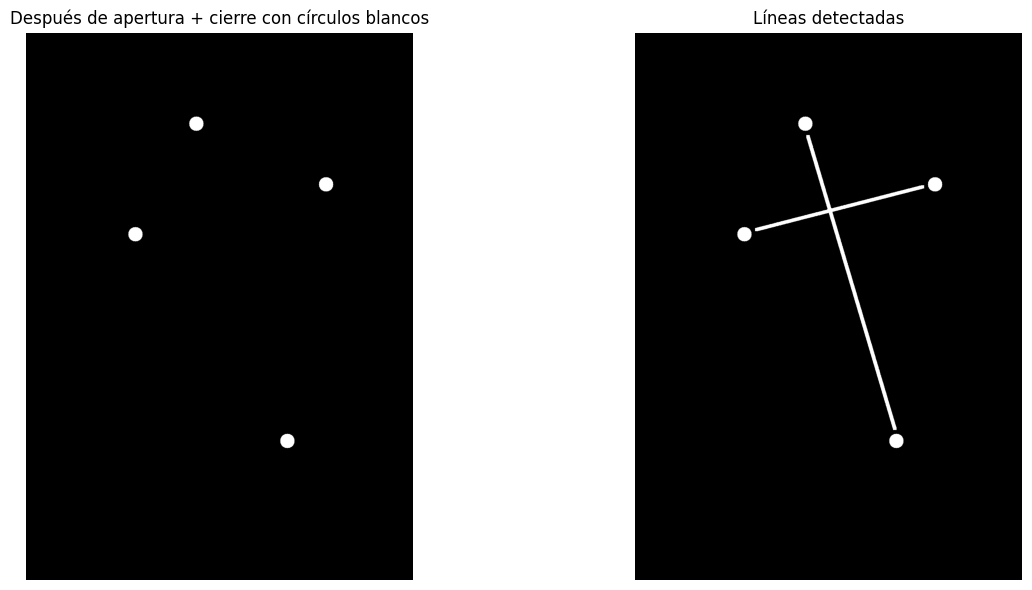

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image40.jpg - Constelación: Horologium – Pendulum Clock
Radio moda (más frecuente): 29 (aparece 3 veces)
Radio promedio: 34.36
Rango aceptable (basado en moda): [23.20, 34.80]
Círculos detectados inicialmente: 11
Círculos rechazados por tamaño: 3
Círculos rechazados por pocos píxeles blancos: 1
Círculos antes de filtrar overlaps: 7
Componentes detectados en imagen final: 14
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 14


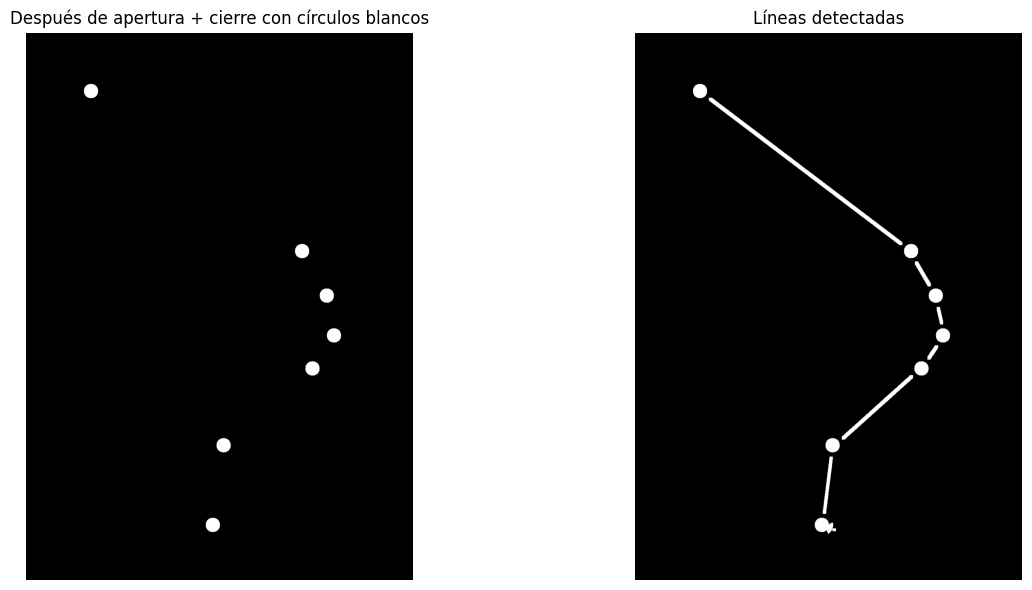

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image78.jpg - Constelación: Telescopium – Telescope
Radio moda (más frecuente): 30 (aparece 3 veces)
Radio promedio: 28.00
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 9
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 1
Círculos antes de filtrar overlaps: 8
Componentes detectados en imagen final: 15
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 15


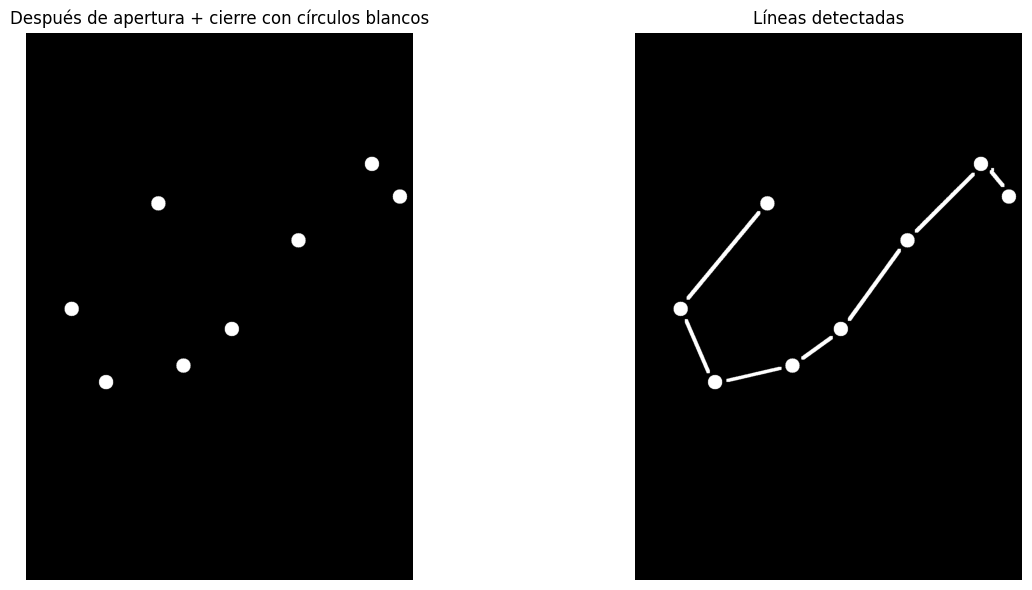

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image12.jpg - Constelación: Canes Venatici – Hunting Dogs
Radio moda (más frecuente): 26 (aparece 1 veces)
Radio promedio: 28.00
Rango aceptable (basado en moda): [20.80, 31.20]
Círculos detectados inicialmente: 4
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 4
Componentes detectados en imagen final: 7
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 7


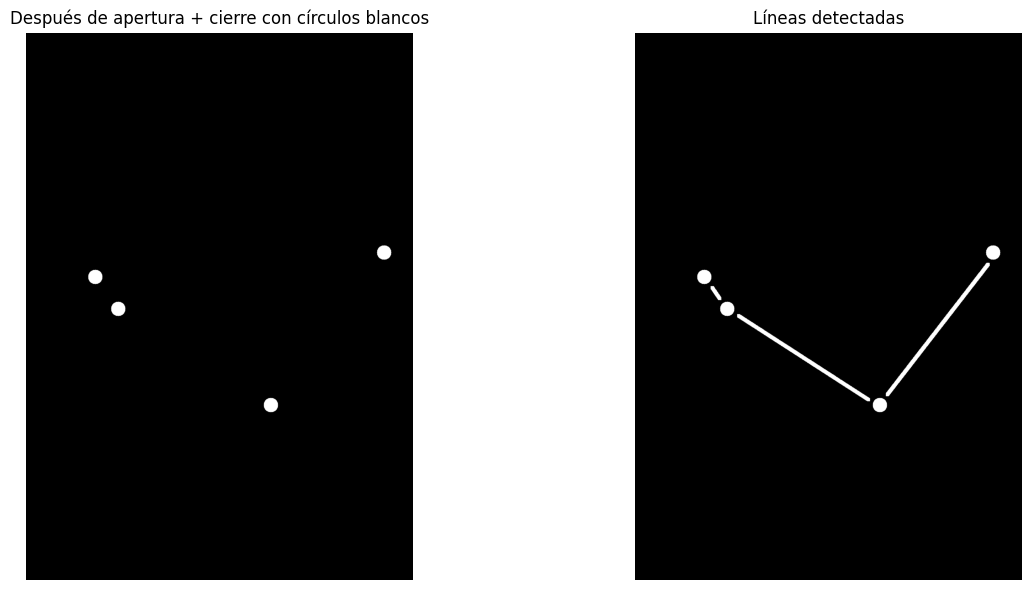

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image52.jpg - Constelación: Mensa – Table Mountain
Radio moda (más frecuente): 30 (aparece 2 veces)
Radio promedio: 28.25
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 4
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 4
Componentes detectados en imagen final: 7
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 7


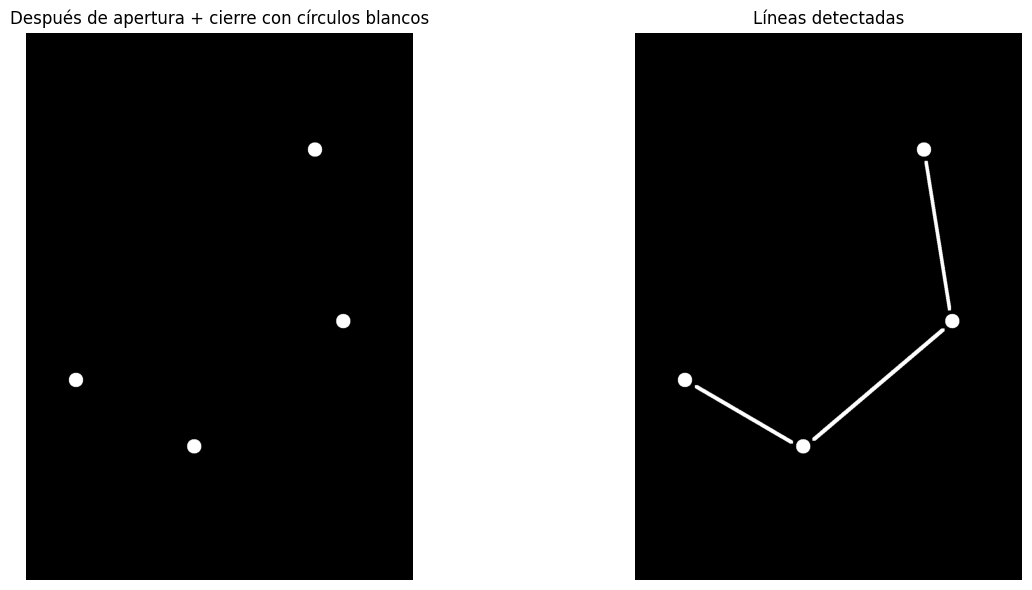

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image86.jpg - Constelación: Volans – Flying Fish
Radio moda (más frecuente): 27 (aparece 5 veces)
Radio promedio: 32.12
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 8
Círculos rechazados por tamaño: 1
Círculos rechazados por pocos píxeles blancos: 1
Círculos antes de filtrar overlaps: 6
Componentes detectados en imagen final: 12
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 12


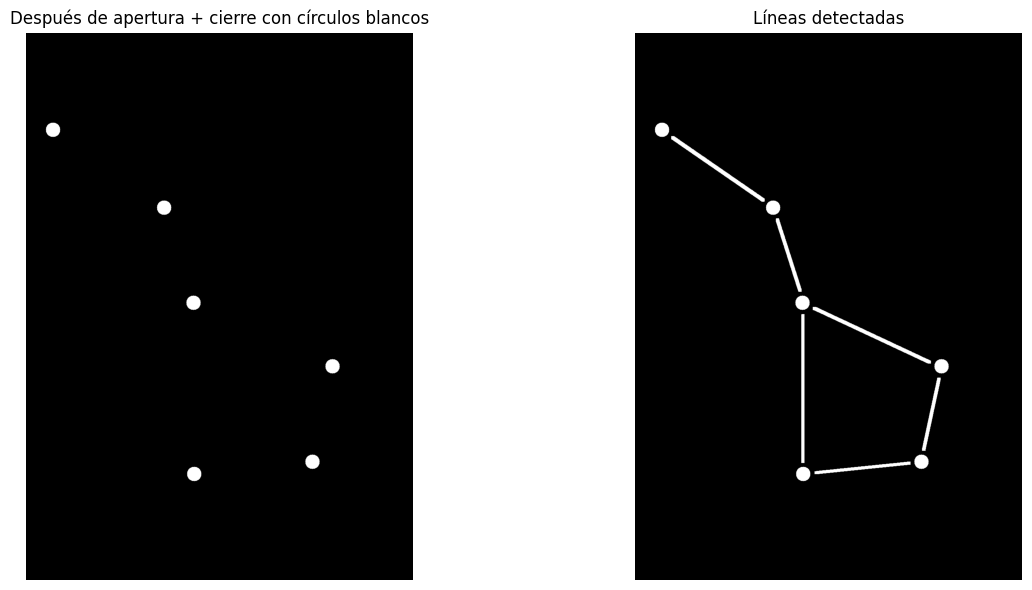

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image17.jpg - Constelación: Cassiopeia – Vain Queen
Radio moda (más frecuente): 30 (aparece 3 veces)
Radio promedio: 28.80
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 5
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 5
Componentes detectados en imagen final: 9
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 9


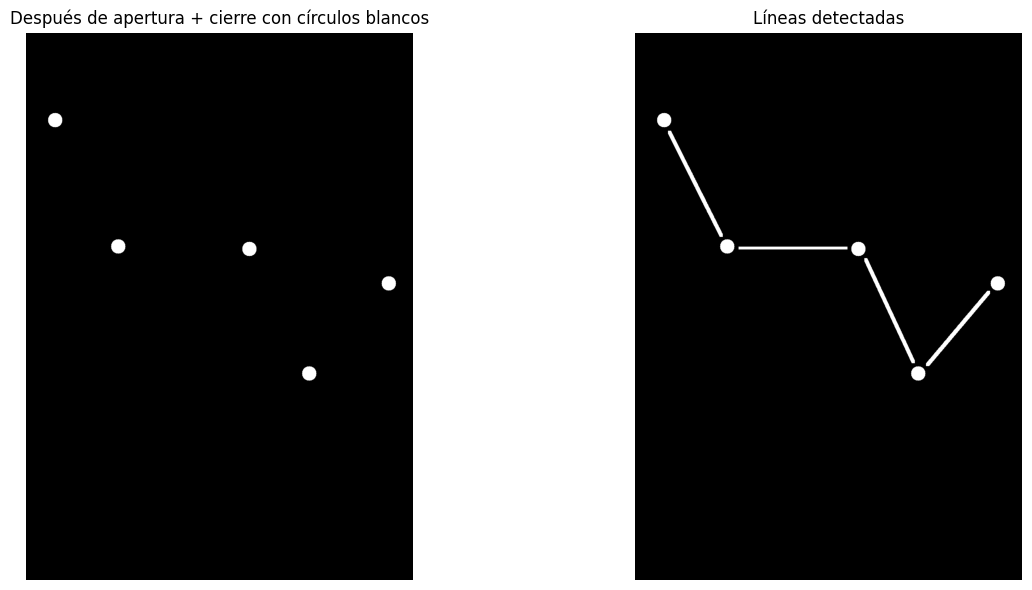

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image66.jpg - Constelación: Piscis Austrinus – Southern Fish
Radio moda (más frecuente): 27 (aparece 4 veces)
Radio promedio: 28.73
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 11
Círculos rechazados por tamaño: 1
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 10
Componentes detectados en imagen final: 20
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 20


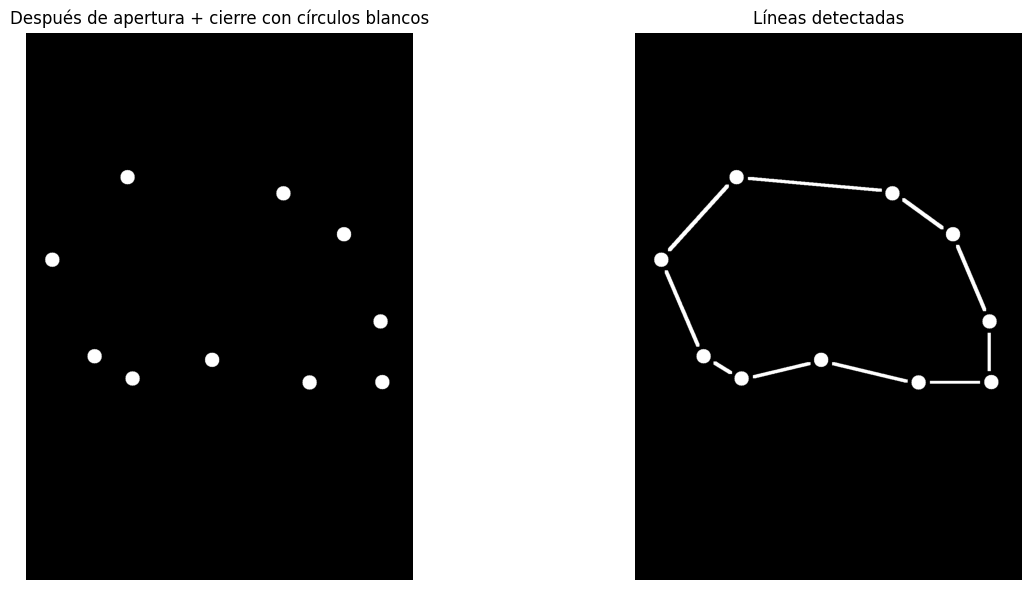

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image6.jpg - Constelación: Aries – Ram
Radio moda (más frecuente): 30 (aparece 5 veces)
Radio promedio: 37.39
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 18
Círculos rechazados por tamaño: 5
Círculos rechazados por pocos píxeles blancos: 2
Círculos antes de filtrar overlaps: 11
Componentes detectados en imagen final: 21
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 21


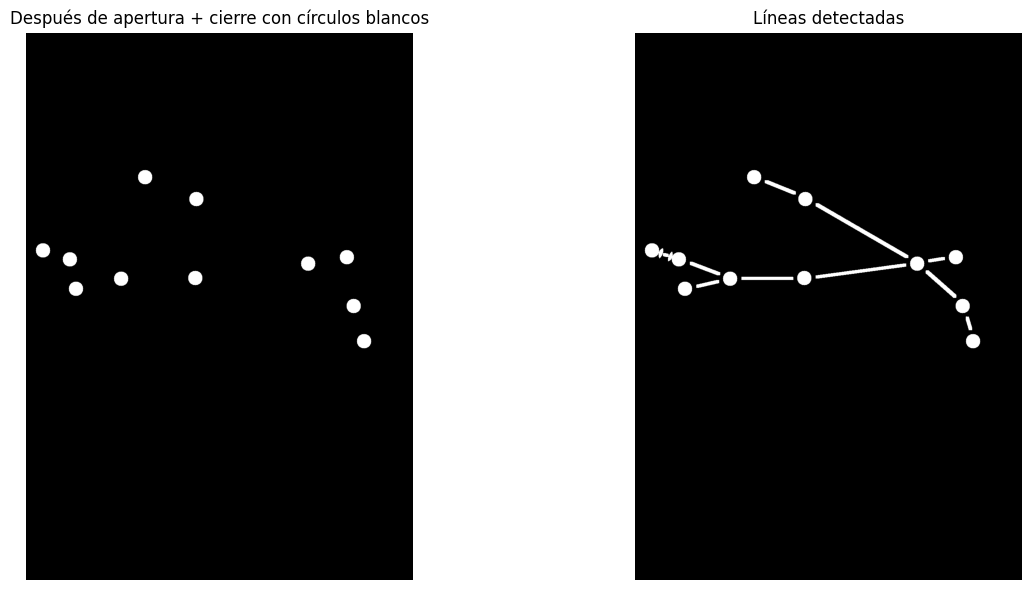

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image0.jpg - Constelación: Andromeda – Royal Sea Monster Bait
Radio moda (más frecuente): 30 (aparece 9 veces)
Radio promedio: 36.63
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 27
Círculos rechazados por tamaño: 8
Círculos rechazados por pocos píxeles blancos: 2
Círculos antes de filtrar overlaps: 17
Componentes detectados en imagen final: 33
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 33


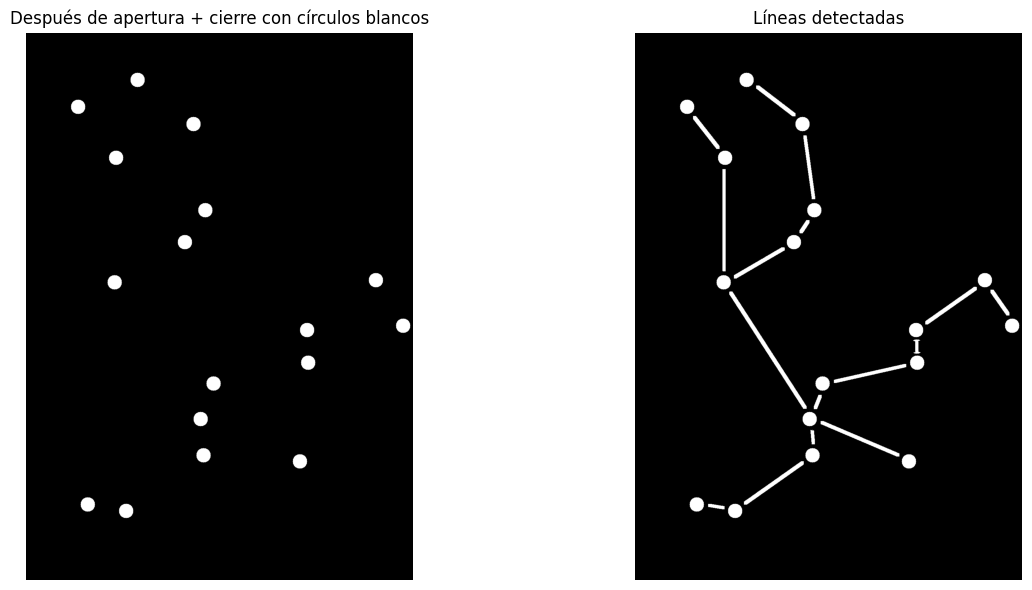

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image10.jpg - Constelación: Camelopardalis – Giraffe
Radio moda (más frecuente): 30 (aparece 6 veces)
Radio promedio: 33.89
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 19
Círculos rechazados por tamaño: 3
Círculos rechazados por pocos píxeles blancos: 1
Círculos antes de filtrar overlaps: 15
Componentes detectados en imagen final: 31
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 31


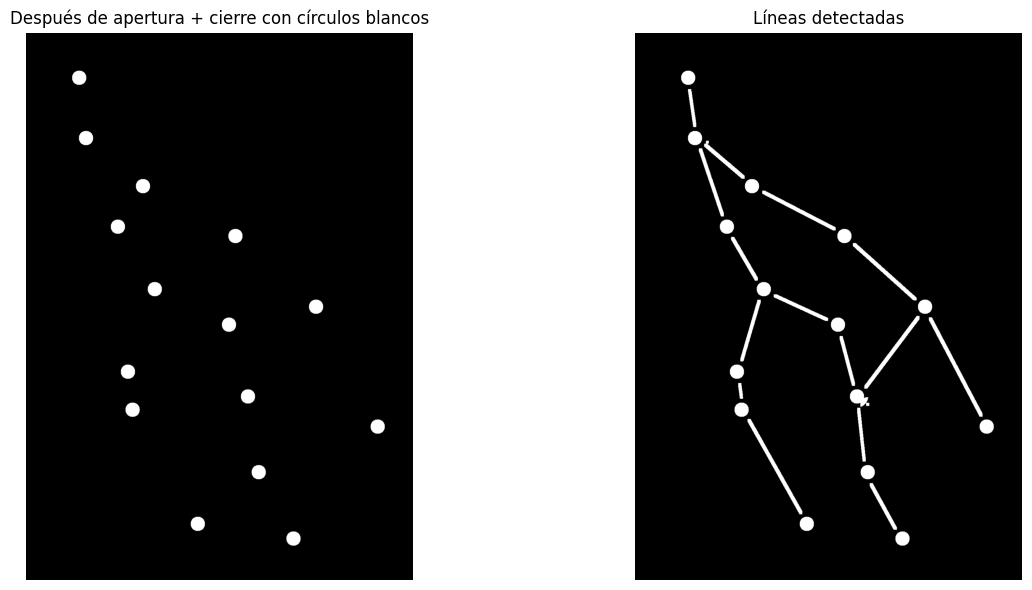

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image68.jpg - Constelación: Pyxis – Compass
Radio moda (más frecuente): 26 (aparece 1 veces)
Radio promedio: 27.67
Rango aceptable (basado en moda): [20.80, 31.20]
Círculos detectados inicialmente: 3
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 3
Componentes detectados en imagen final: 5
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 5


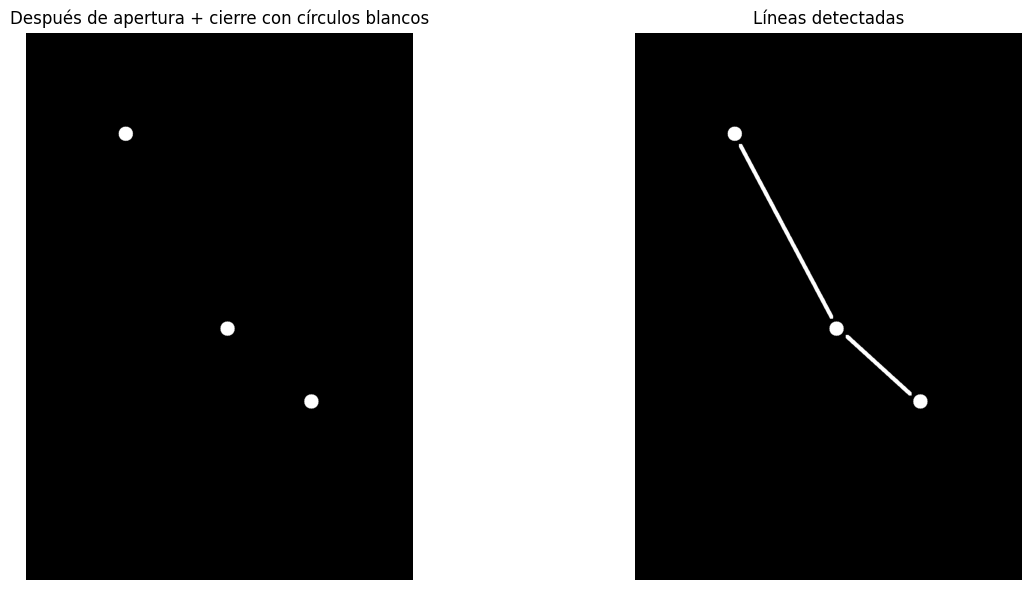

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image80.jpg - Constelación: Triangulum Australe – Southern triangle
Radio moda (más frecuente): 27 (aparece 2 veces)
Radio promedio: 28.50
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 4
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 4
Componentes detectados en imagen final: 8
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 8


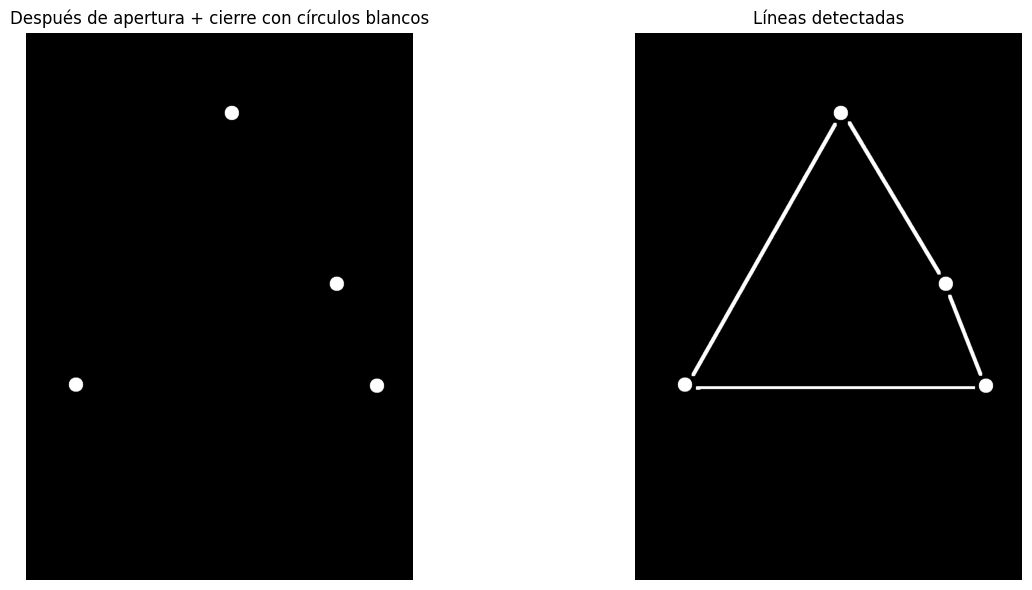

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image25.jpg - Constelación: Corona Australis – Southern Crown
Radio moda (más frecuente): 27 (aparece 3 veces)
Radio promedio: 28.14
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 7
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 7
Componentes detectados en imagen final: 14
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 14


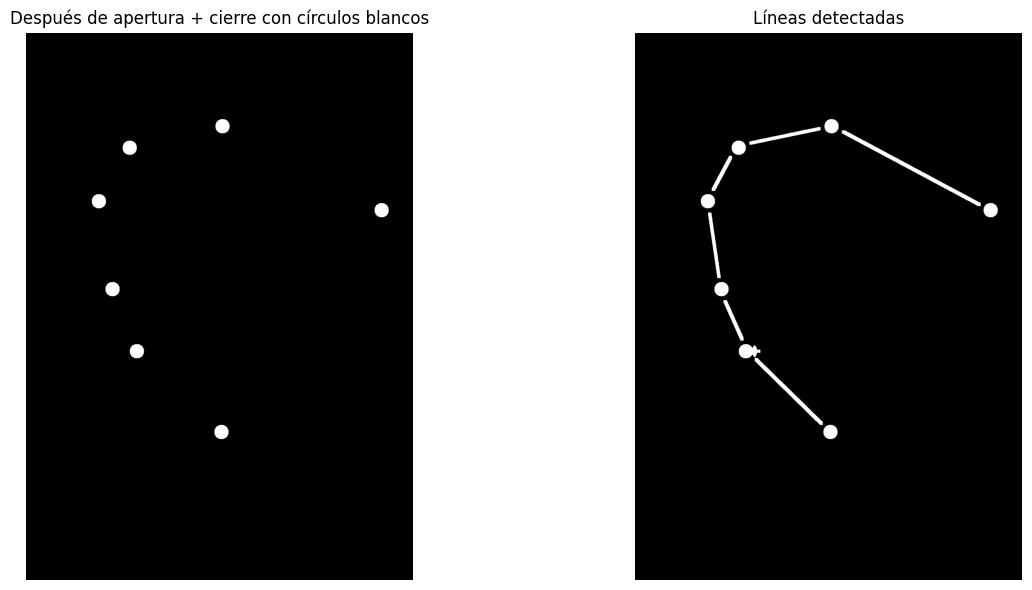

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image76.jpg - Constelación: Sextans – Sextant
Radio moda (más frecuente): 27 (aparece 2 veces)
Radio promedio: 34.80
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 5
Círculos rechazados por tamaño: 1
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 4
Componentes detectados en imagen final: 8
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 8


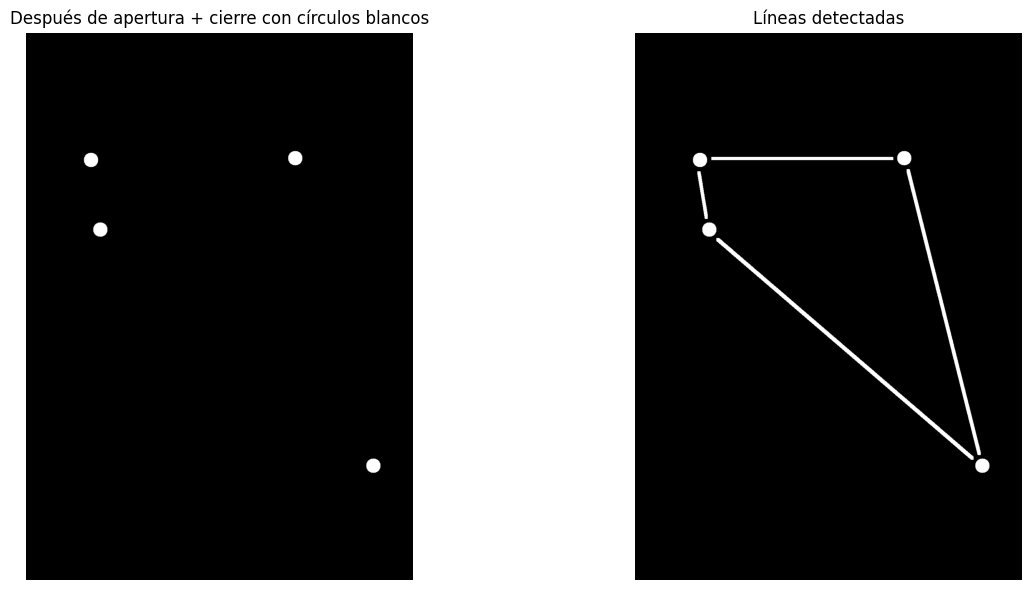

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image69.jpg - Constelación: Reticulum – Reticle
Radio moda (más frecuente): 30 (aparece 4 veces)
Radio promedio: 29.17
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 6
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 6
Componentes detectados en imagen final: 12
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 12


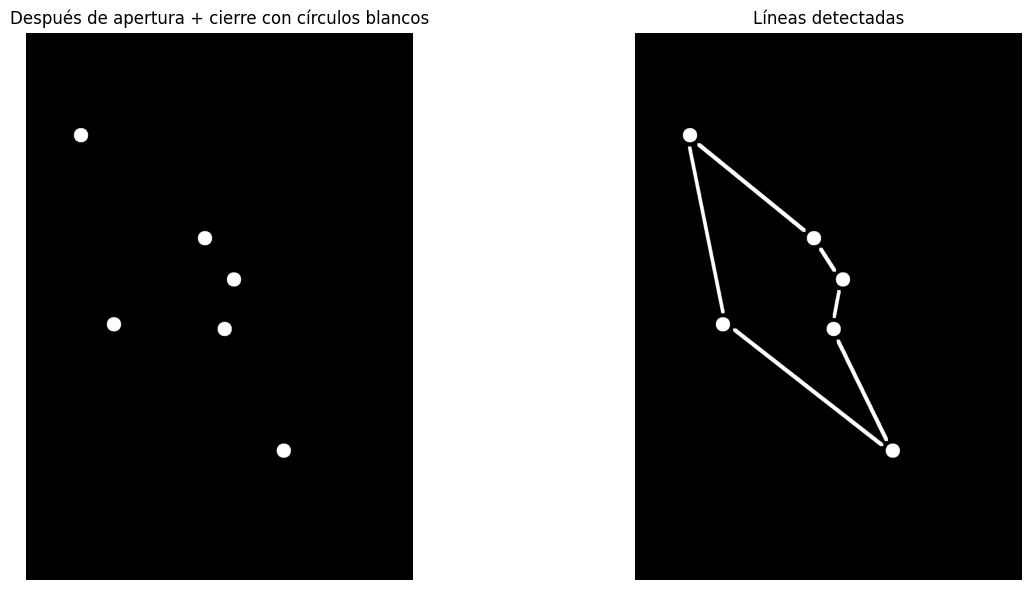

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image31.jpg - Constelación: Delphinus – Dolphin
Radio moda (más frecuente): 29 (aparece 3 veces)
Radio promedio: 28.20
Rango aceptable (basado en moda): [23.20, 34.80]
Círculos detectados inicialmente: 5
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 5
Componentes detectados en imagen final: 10
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 10


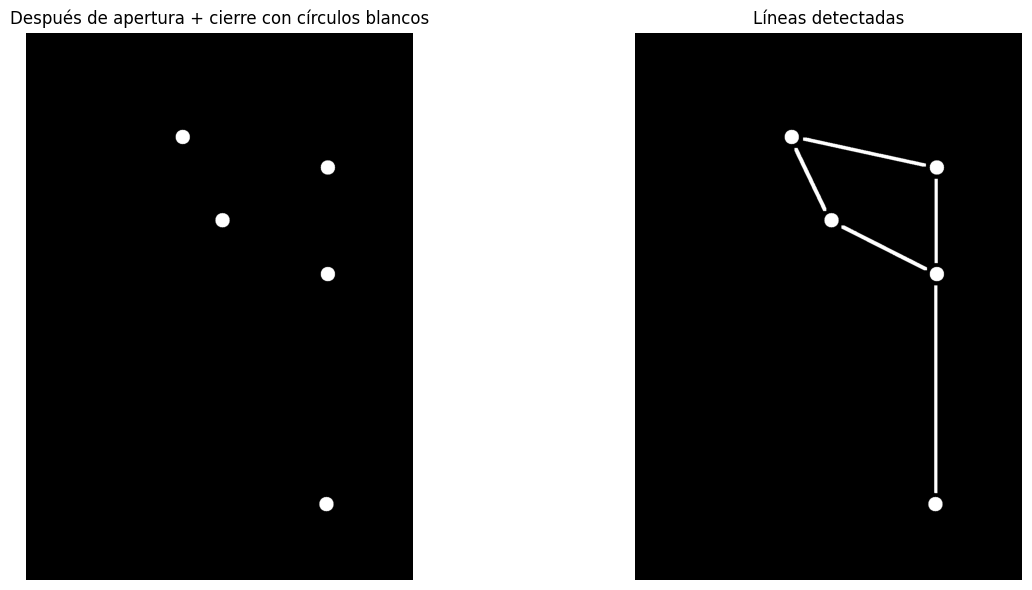

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image16.jpg - Constelación: Carina – Keel of Argo Navis
Radio moda (más frecuente): 27 (aparece 4 veces)
Radio promedio: 30.91
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 11
Círculos rechazados por tamaño: 1
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 10
Componentes detectados en imagen final: 20
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 20


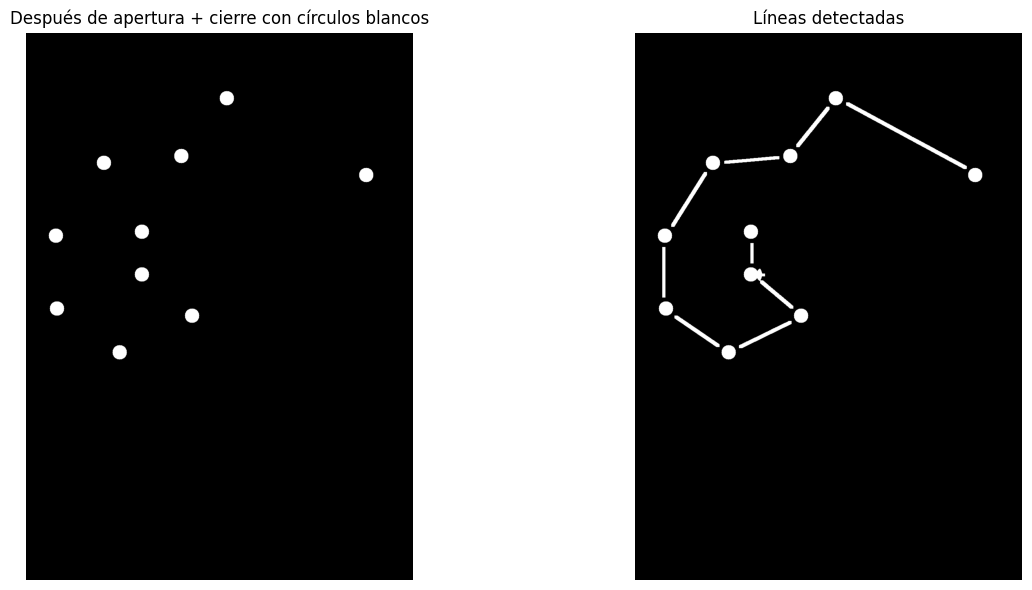

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image45.jpg - Constelación: Leo – Lion
Radio moda (más frecuente): 27 (aparece 8 veces)
Radio promedio: 34.70
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 23
Círculos rechazados por tamaño: 7
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 16
Componentes detectados en imagen final: 31
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 31


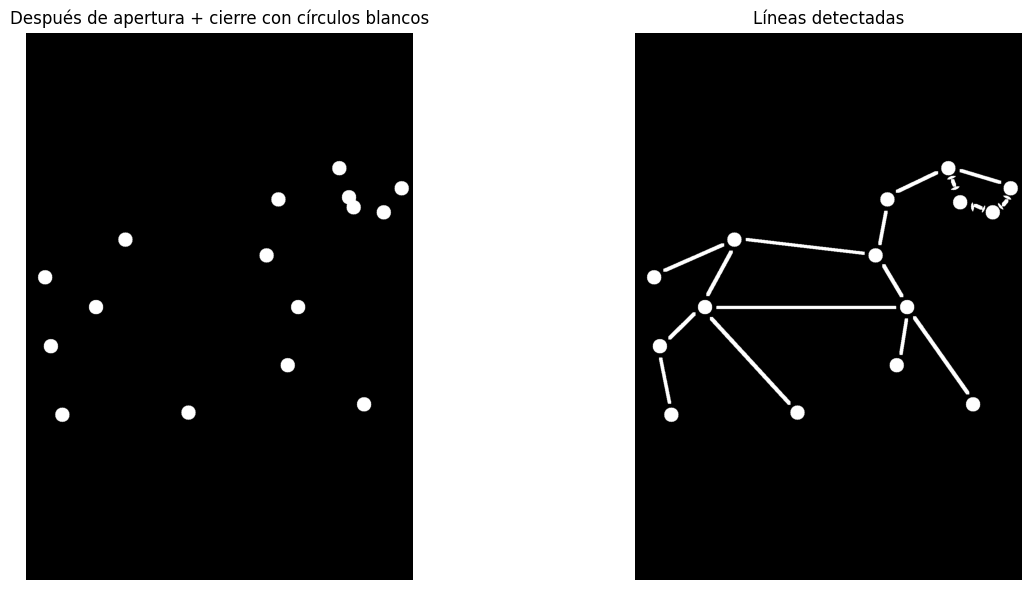

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image8.jpg - Constelación: Boötes – Herdsman
Radio moda (más frecuente): 27 (aparece 5 veces)
Radio promedio: 38.92
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 24
Círculos rechazados por tamaño: 9
Círculos rechazados por pocos píxeles blancos: 1
Círculos antes de filtrar overlaps: 14
Componentes detectados en imagen final: 26
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 26


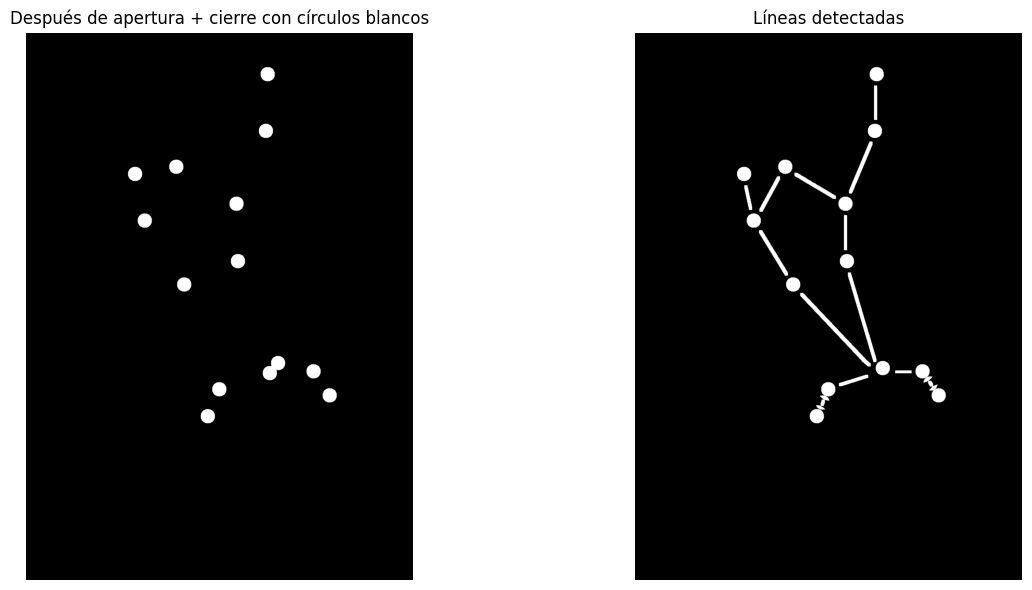

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image83.jpg - Constelación: Ursa Minor – Small bear
Radio moda (más frecuente): 27 (aparece 2 veces)
Radio promedio: 28.14
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 7
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 7
Componentes detectados en imagen final: 14
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 14


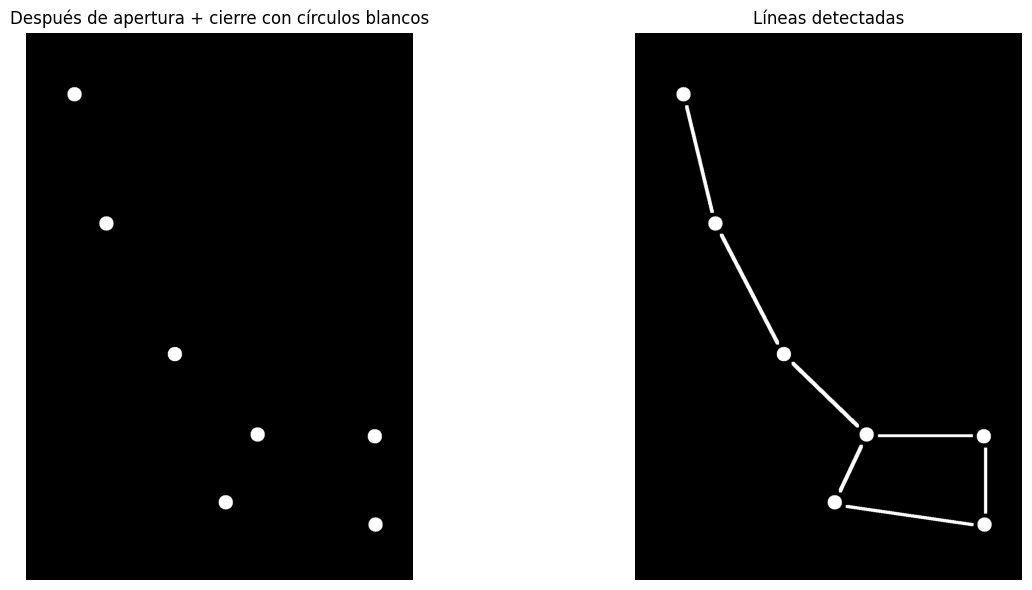

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image14.jpg - Constelación: Canis Minor – Small Dog
Radio moda (más frecuente): 30 (aparece 2 veces)
Radio promedio: 30.00
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 2
Círculos rechazados por tamaño: 0
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 2
Componentes detectados en imagen final: 3
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 3


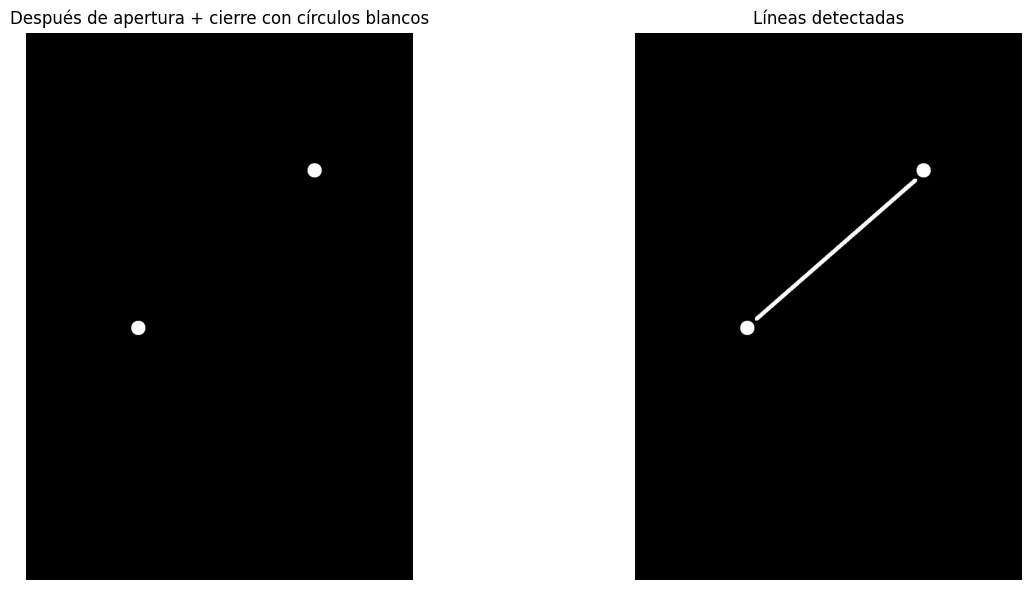

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image47.jpg - Constelación: Lepus – Hare/Rabbit
Radio moda (más frecuente): 30 (aparece 5 veces)
Radio promedio: 29.14
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 14
Círculos rechazados por tamaño: 2
Círculos rechazados por pocos píxeles blancos: 1
Círculos antes de filtrar overlaps: 11
Componentes detectados en imagen final: 23
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 23


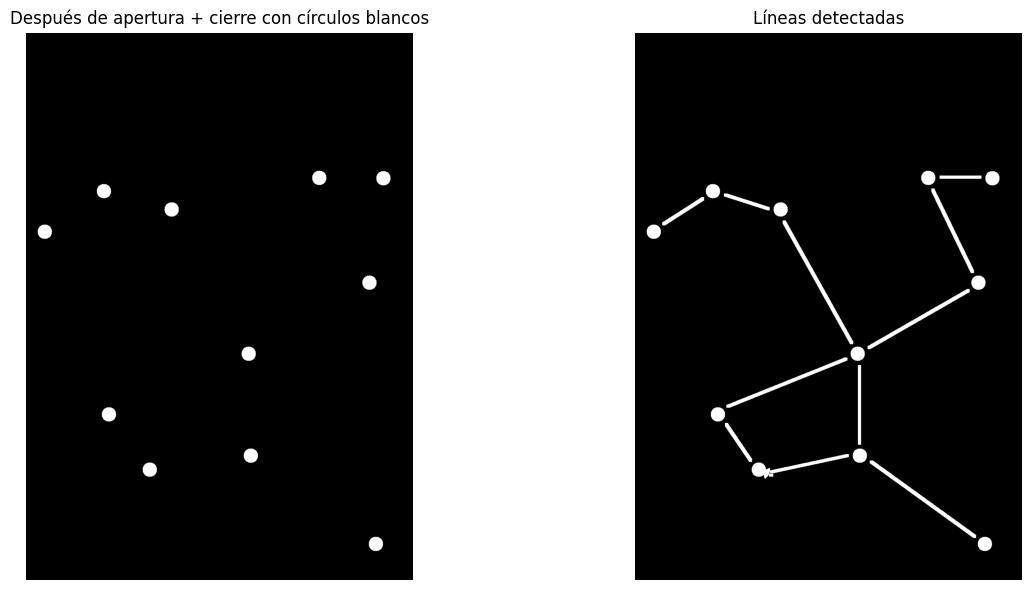

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image74.jpg - Constelación: Scutum – Shield
Radio moda (más frecuente): 27 (aparece 2 veces)
Radio promedio: 37.20
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 5
Círculos rechazados por tamaño: 1
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 4
Componentes detectados en imagen final: 7
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 7


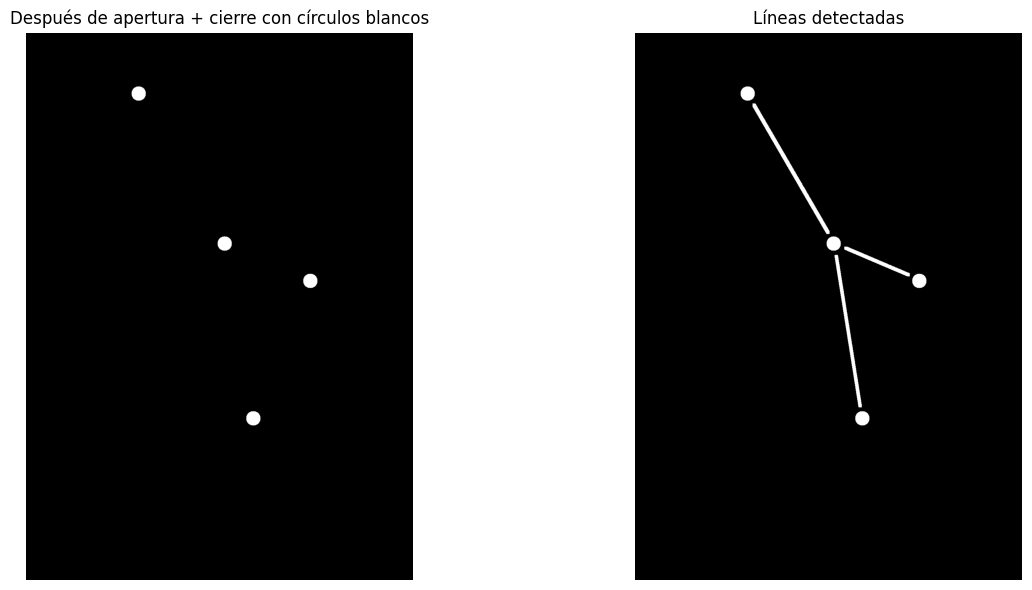

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image79.jpg - Constelación: Triangulum – Triangle
Radio moda (más frecuente): 30 (aparece 2 veces)
Radio promedio: 34.00
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 4
Círculos rechazados por tamaño: 1
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 3
Componentes detectados en imagen final: 6
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 6


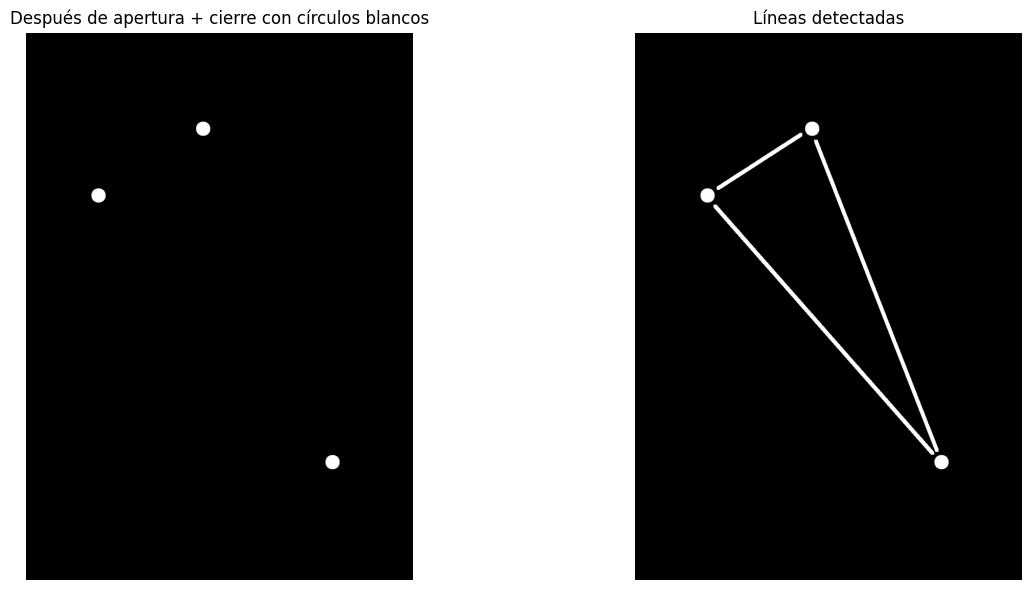

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image20.jpg - Constelación: Cetus – Whale
Radio moda (más frecuente): 30 (aparece 10 veces)
Radio promedio: 29.75
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 16
Círculos rechazados por tamaño: 1
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 15
Componentes detectados en imagen final: 31
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 31


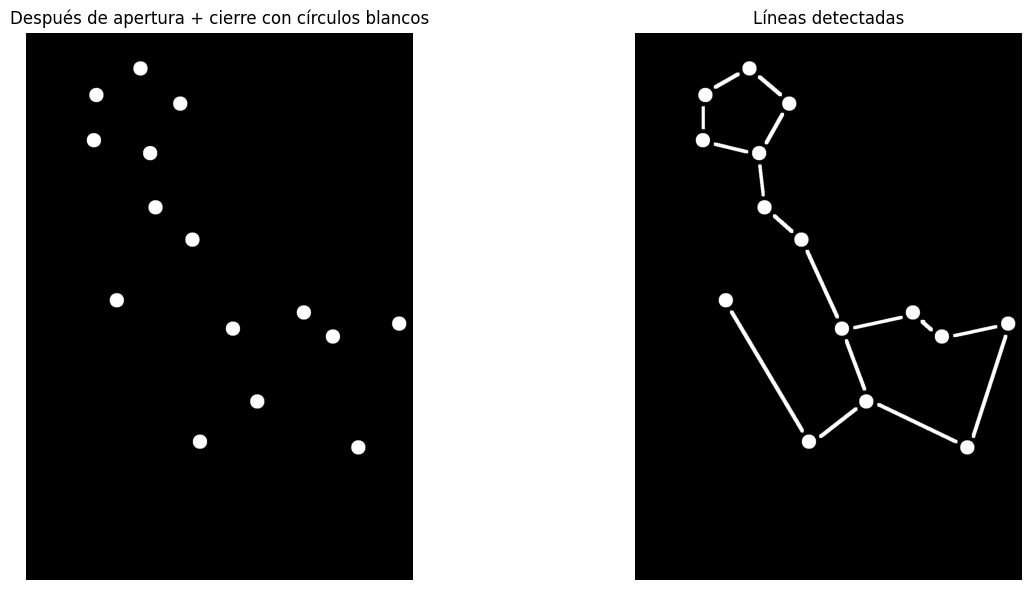

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image22.jpg - Constelación: Circinus – Compass
Radio moda (más frecuente): 26 (aparece 2 veces)
Radio promedio: 37.29
Rango aceptable (basado en moda): [20.80, 31.20]
Círculos detectados inicialmente: 7
Círculos rechazados por tamaño: 2
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 5
Componentes detectados en imagen final: 8
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 8


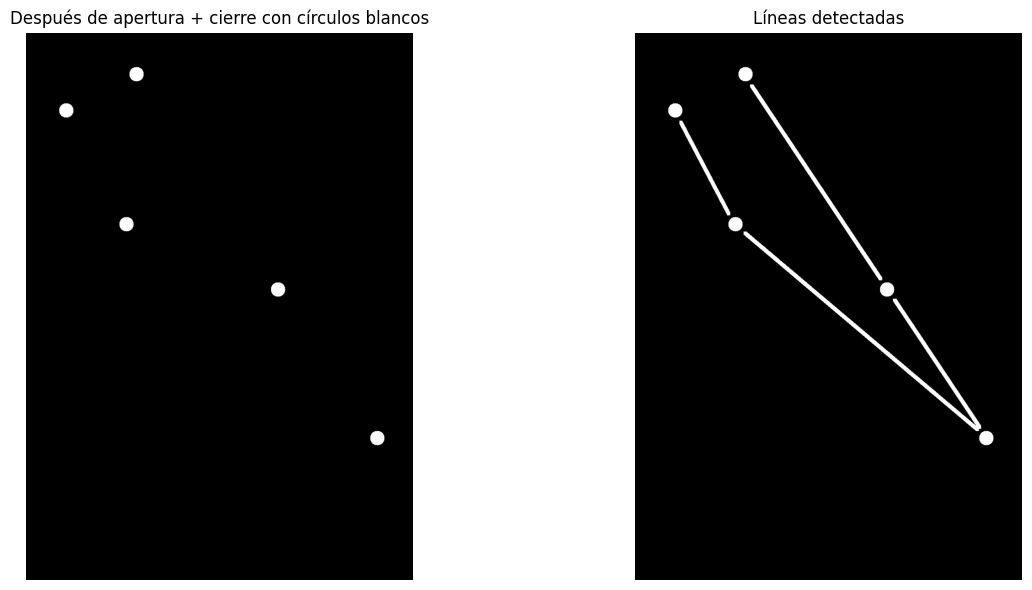

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image61.jpg - Constelación: Pegasus – Winged horse
Radio moda (más frecuente): 30 (aparece 8 veces)
Radio promedio: 37.50
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 22
Círculos rechazados por tamaño: 6
Círculos rechazados por pocos píxeles blancos: 1
Círculos antes de filtrar overlaps: 15
Componentes detectados en imagen final: 30
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 30


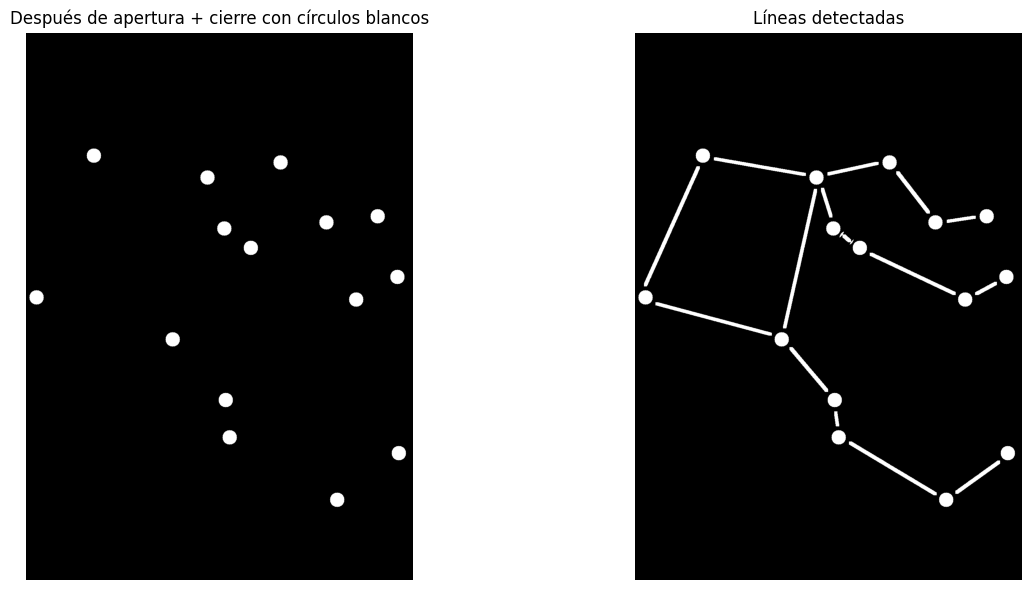

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image84.jpg - Constelación: Vela – Sails of Argo Navis
Radio moda (más frecuente): 30 (aparece 6 veces)
Radio promedio: 30.77
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 13
Círculos rechazados por tamaño: 1
Círculos rechazados por pocos píxeles blancos: 1
Círculos antes de filtrar overlaps: 11
Componentes detectados en imagen final: 22
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 22


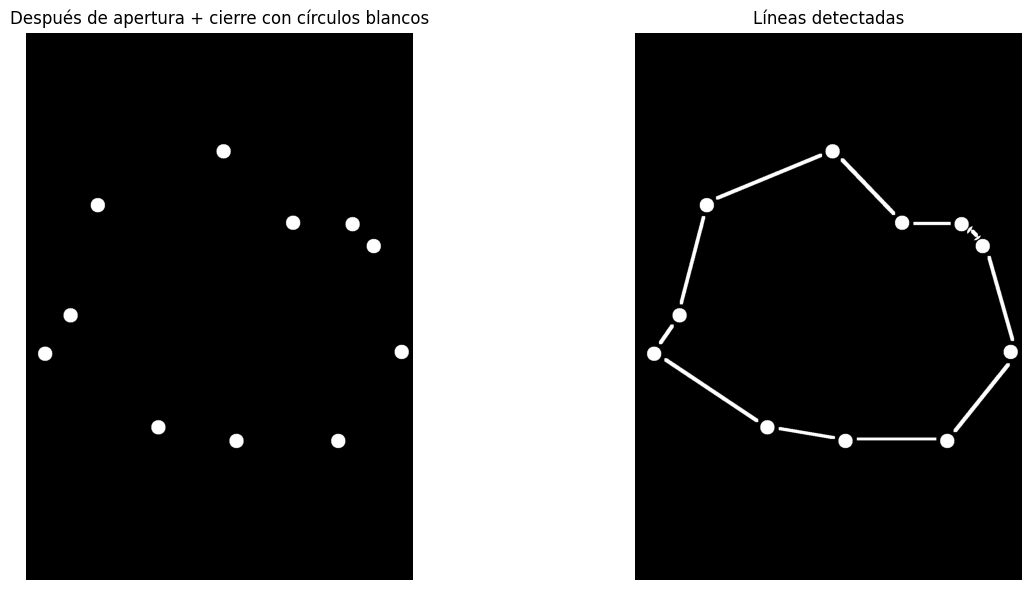

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image51.jpg - Constelación: Lyra – Harp
Radio moda (más frecuente): 30 (aparece 7 veces)
Radio promedio: 34.07
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 14
Círculos rechazados por tamaño: 2
Círculos rechazados por pocos píxeles blancos: 2
Círculos antes de filtrar overlaps: 10
Componentes detectados en imagen final: 19
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 19


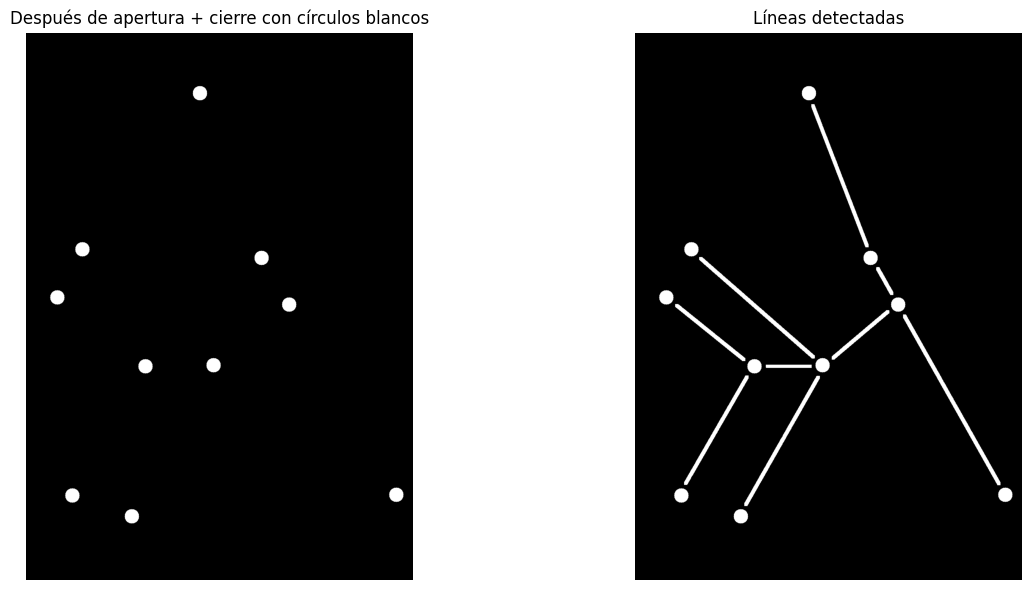

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image73.jpg - Constelación: Sculptor – Sculptor
Radio moda (más frecuente): 27 (aparece 4 veces)
Radio promedio: 32.89
Rango aceptable (basado en moda): [21.60, 32.40]
Círculos detectados inicialmente: 9
Círculos rechazados por tamaño: 1
Círculos rechazados por pocos píxeles blancos: 0
Círculos antes de filtrar overlaps: 8
Componentes detectados en imagen final: 15
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 15


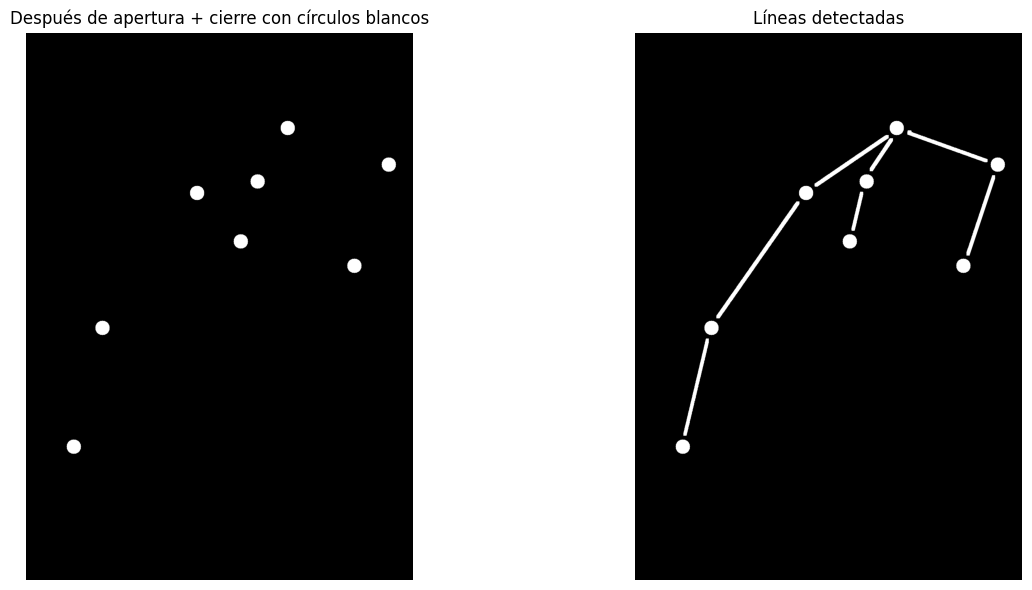

Procesando imagen: /home/stargix/.cache/kagglehub/datasets/theprakharsrivastava/stargazer/versions/1/Contellations Segmentation/train/image63.jpg - Constelación: Phoenix – Firebird
Radio moda (más frecuente): 30 (aparece 5 veces)
Radio promedio: 31.29
Rango aceptable (basado en moda): [24.00, 36.00]
Círculos detectados inicialmente: 14
Círculos rechazados por tamaño: 2
Círculos rechazados por pocos píxeles blancos: 1
Círculos antes de filtrar overlaps: 11
Componentes detectados en imagen final: 22
Círculos eliminados por overlap: 0
Círculos finales después de filtrar overlap: 22


In [ ]:
from constellation_processing import process_constellation_image_new, visualize_results
import cv2
import numpy as np
import matplotlib.pyplot as plt

save_path = "./processed_constellations"

# Crear la carpeta si no existe
os.makedirs(save_path, exist_ok=True)
print(f"Carpeta de destino: {os.path.abspath(save_path)}\n")

for idx, row in df_constellations.iterrows():
    image_path = row['full_path']
    constellation_name = row['constellation_name'] if pd.notna(row['constellation_name']) else "Desconocida"
    
    print(f"Procesando imagen: {image_path} - Constelación: {constellation_name}")
    
    # Procesar imagen
    image_circles, image_lines, output_filtered = process_constellation_image_new(image_path)

    # Save processed images
    base_filename = os.path.splitext(os.path.basename(image_path))[0]
    circles_path = os.path.join(save_path, f"{base_filename}_circles.png")
    lines_path = os.path.join(save_path, f"{output_filtered}_lines.png")

    cv2.imwrite(circles_path, image_circles)
    cv2.imwrite(lines_path, image_lines)

    # Visualizar la imagen original junto con los resultados procesados
    img_original = cv2.imread(image_path)
    img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

    visualize_results(image_circles, output_filtered)